# ETL

En esta etapa se trabajará con los dataframes obtenidos luego de la etapa de ETL.
Se cuenta con 3 dataframes:
- df_combinado.csv
- df_nacional.csv
- df_partidos.csv
- df_indicadores.csv

Se instalan las librerias que se usarán en este proceso

In [91]:
!pip install geopandas


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\AGaby\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [92]:
# Descargar librerias necesarias para manipulación de datos 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from sklearn.decomposition import PCA


__________________________________________________________________________

# Dataframe: "df_combinado"

El DataFrame "df_combinado" contiene información sobre las conexiones de Internet en diferentes provincias a lo largo de varios años y trimestres. A continuación se muestra una descripción de las columnas del DataFrame:

- Año: El año correspondiente a los datos de la fila.
- Trimestre: El trimestre correspondiente a los datos de la fila.
- Provincia: El nombre de la provincia para la cual se proporcionan los datos.
- ADSL: Número de conexiones de tipo ADSL en la provincia para el año y trimestre específicos.
- Cablemodem: Número de conexiones de tipo Cablemodem en la provincia para el año y trimestre específicos.
- Fibra óptica: Número de conexiones de tipo Fibra óptica en la provincia para el año y trimestre específicos.
- Wireless: Número de conexiones de tipo Wireless en la provincia para el año y trimestre específicos.
- Otros: Número de conexiones de otros tipos en la provincia para el año y trimestre específicos.
- Total_conexion: Total de conexiones de Internet en la provincia para el año y trimestre específicos.
- Accesos por cada 100 hab: Número de accesos a Internet por cada 100 habitantes en la provincia para el año y trimestre específicos.
- Accesos por cada 100 hogares: Número de accesos a Internet por cada 100 hogares en la provincia para el año y trimestre específicos.
- Banda ancha fija: Número de conexiones de banda ancha fija en la provincia para el año y trimestre específicos.
- Dial up: Número de conexiones de tipo Dial up en la provincia para el año y trimestre específicos.
- Hasta 512 kbps: Número de conexiones con velocidad hasta 512 kbps en la provincia para el año y trimestre específicos.
- 512 Kbps - 1 Mbps: Número de conexiones con velocidad entre 512 Kbps y 1 Mbps en la provincia para el año y trimestre específicos.
- 1 Mbps - 6 Mbps: Número de conexiones con velocidad entre 1 Mbps y 6 Mbps en la provincia para el año y trimestre específicos.
- 6 Mbps - 10 Mbps: Número de conexiones con velocidad entre 6 Mbps y 10 Mbps en la provincia para el año y trimestre específicos.
- 10 Mbps - 20 Mbps: Número de conexiones con velocidad entre 10 Mbps y 20 Mbps en la provincia para el año y trimestre específicos.
- 20 Mbps - 30 Mbps: Número de conexiones con velocidad entre 20 Mbps y 30 Mbps en la provincia para el año y trimestre específicos.
- 30 Mbps: Número de conexiones con velocidad superior a 30 Mbps en la provincia para el año y trimestre específicos.
- Otros Mbps: Número de conexiones con velocidad de otros tipos en la provincia para el año y trimestre específicos.
- Total suma Mbps: Total de la suma de todas las conexiones de Internet por velocidad en la provincia para el año y trimestre específicos.

In [2]:
# Carga del archivo:
df_combinado = pd.read_csv(r"df_combinado.csv")
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   ADSL                          840 non-null    int64  
 4   Cablemodem                    840 non-null    int64  
 5   Fibra óptica                  840 non-null    int64  
 6   Wireless                      840 non-null    int64  
 7   Otros                         840 non-null    int64  
 8   Total_conexion                840 non-null    int64  
 9   Accesos por cada 100 hab      840 non-null    int64  
 10  Accesos por cada 100 hogares  840 non-null    float64
 11  Banda ancha fija              840 non-null    int64  
 12  Dial up                       840 non-null    int64  
 13  Hasta

In [3]:
# Visualizamos algunos datos del df
df_combinado.sample(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_conexion,Accesos por cada 100 hab,...,Dial up,Hasta 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros Mbps,Total suma Mbps
688,2015,3,Salta,78064,21688,47,1290,6450,100573,8,...,3,1126,12223,65405,17451,4318,61,5,0,100589
404,2018,3,Santa Fe,339126,312866,11749,16337,15022,695100,20,...,217,467,36786,269211,115907,162545,62479,31266,13911,692572
614,2016,2,Neuquén,51742,42370,1088,12466,2849,110515,18,...,2291,1916,1691,88854,583,10241,1285,208,0,104778


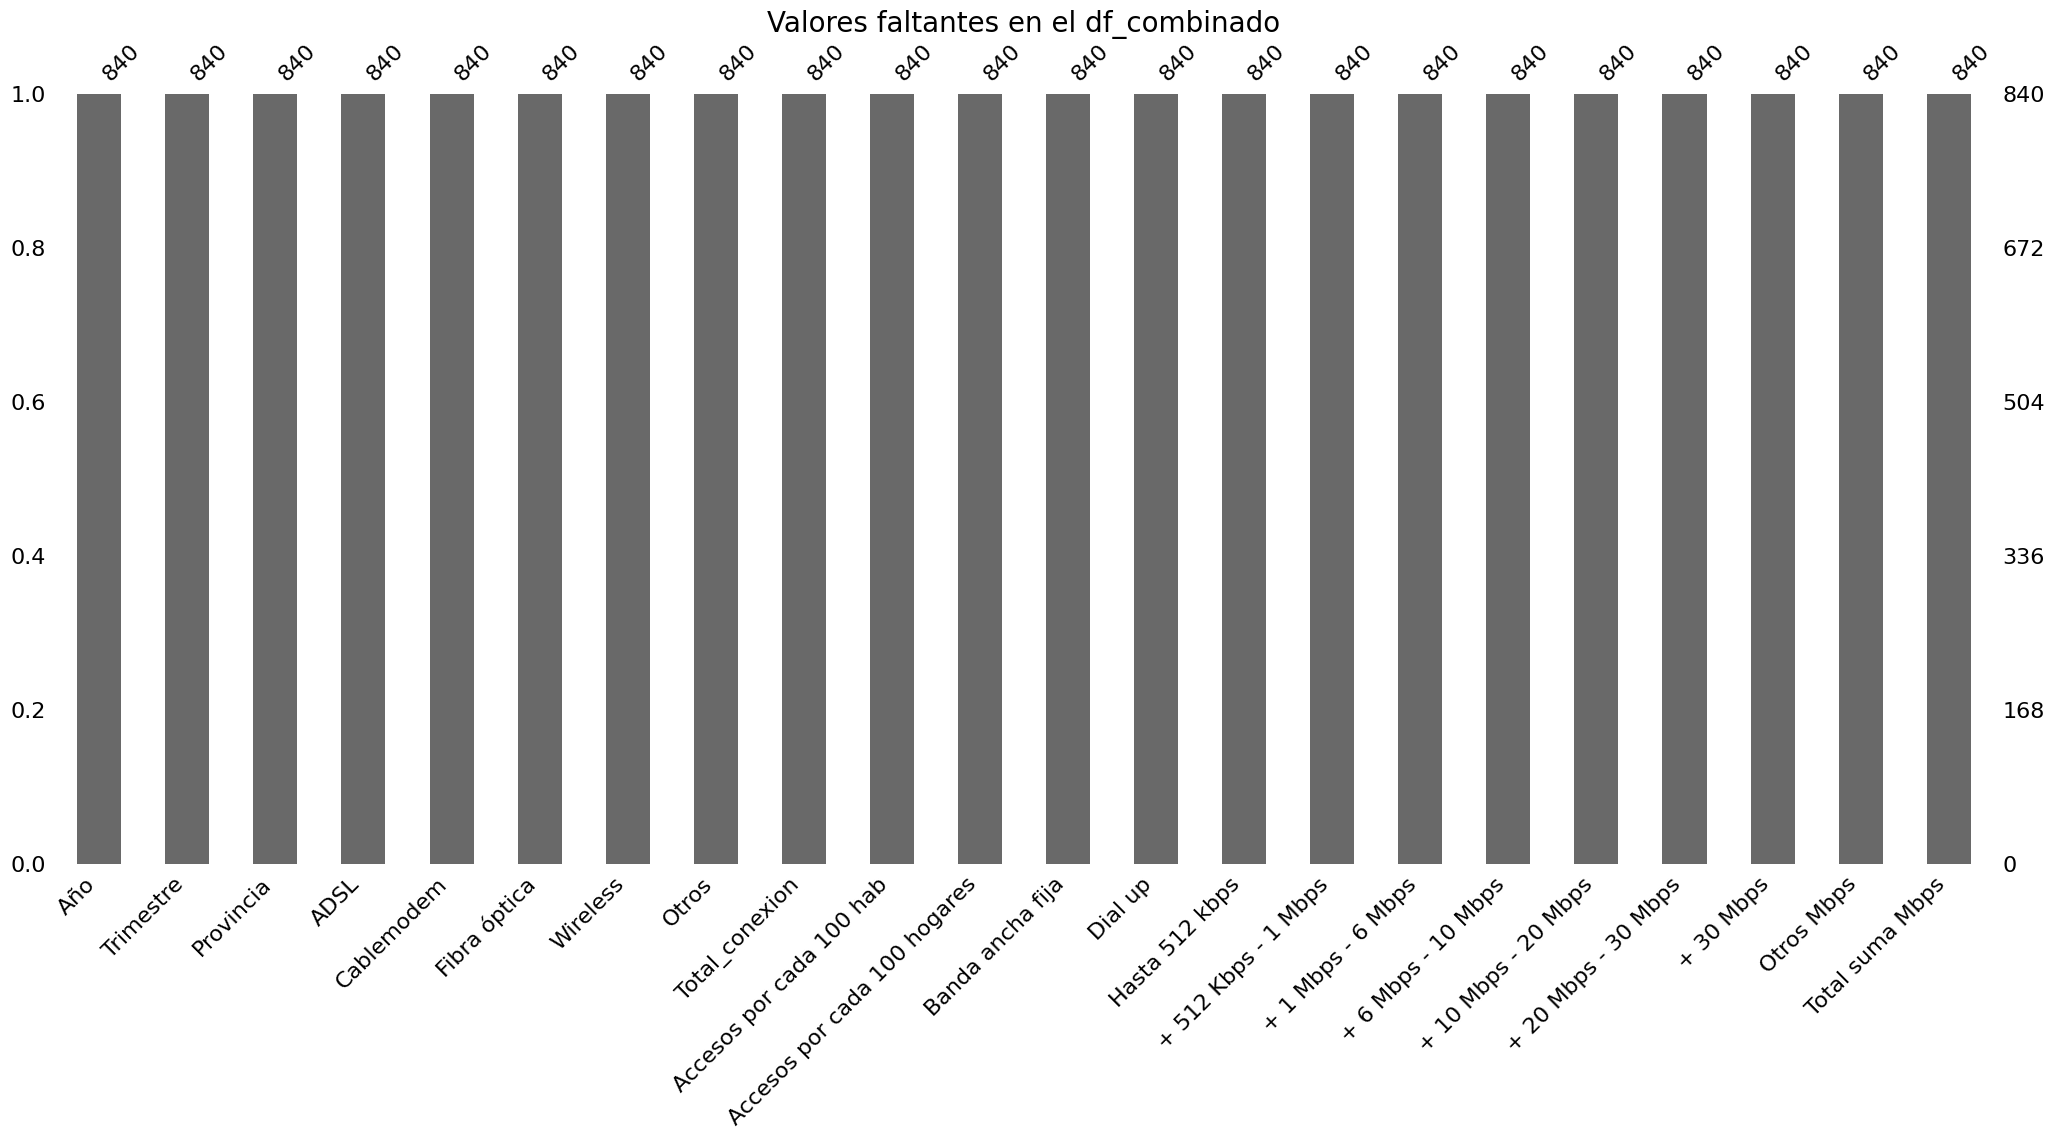

In [4]:
# Revisamos los valores faltantes del df
msno.bar(df_combinado)
plt.title('Valores faltantes en el df_combinado', fontsize=20) 
plt.show() # en este caso vemos que todas las columnas contienen la misma cantidad de datos

## Analisis univariado

Se comienza con el análisis de las variables:  

- **ADSL:** (Asymmetric Digital Subscriber Line) es una tecnología de transmisión de datos de banda ancha a través de líneas telefónicas de cobre. Permite una mayor velocidad de descarga en comparación con la velocidad de carga.
- **Cablemodem:**  se refiere a la conexión de banda ancha a través de la red de televisión por cable. Usa la infraestructura de cables coaxiales existente para transmitir datos de alta velocidad.
- **Fibra óptica:** es un medio de transmisión de datos que utiliza cables hechos de hilos de vidrio o plástico muy finos. Proporciona una velocidad de conexión muy alta y una menor atenuación de la señal en comparación con otras tecnologías.
- **Wireless:** son las conexiones de banda ancha inalámbricas, donde los dispositivos se conectan a través de señales de radio o redes de área local inalámbricas (WLAN) como Wi-Fi.
- **Otros:** esta categoría incluye conexiones de banda ancha que no se clasifican en las categorías anteriores. Puede incluir tecnologías emergentes o menos comunes de acceso a Internet de alta velocidad.

Estas tecnologías representan diferentes formas de acceso a Internet de banda ancha que ofrecen velocidades más rápidas y mejor rendimiento en comparación con las conexiones de acceso telefónico tradicionales.

In [5]:
# Se visualizan los estadísticos de las columnas de los tipos de conexión
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_estadisticos = df_combinado[columnas].describe()
print(df_estadisticos)

               ADSL    Cablemodem  Fibra óptica       Wireless         Otros
count  8.400000e+02  8.400000e+02  8.400000e+02     840.000000    840.000000
mean   1.275668e+05  1.717750e+05  2.991186e+04    9937.419048   6603.879762
std    2.550543e+05  4.221661e+05  1.235013e+05   17564.217475  10132.970568
min    6.842000e+03  0.000000e+00  0.000000e+00       0.000000     13.000000
25%    2.247925e+04  8.599750e+03  1.860000e+02    1158.500000    772.500000
50%    4.859600e+04  3.498400e+04  1.093000e+03    4262.000000   2734.500000
75%    1.045695e+05  7.074850e+04  1.386250e+04   11333.500000   7546.500000
max    1.586343e+06  2.748325e+06  1.436433e+06  126887.000000  73415.000000


Podemos notar que hay igual cantidad de datos para todos los tipos de conexiones. El promedio de los valores es mayor para ADSL y cablemodem, luego de fibra óptica y finalmente de Wireless y otros tipos de conexión. 

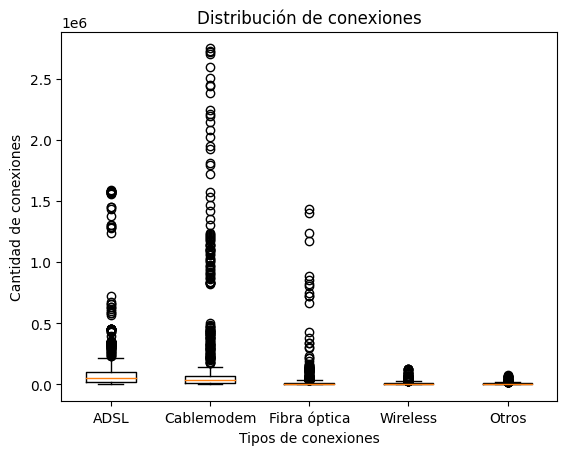

In [6]:
# De forma gráfica:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
plt.boxplot(df_combinado[columnas])
plt.ylabel('Cantidad de conexiones')
plt.xlabel('Tipos de conexiones')
plt.title('Distribución de conexiones')
plt.xticks(range(1, len(columnas) + 1), columnas)
plt.show()

Vemos que hay una mayor dispersión de datos en cablemodem, seguida de ADSL y fibra óptica.  

Revision de las variables:  

- **Año** 
- **Timestre**  
- **Provincia**

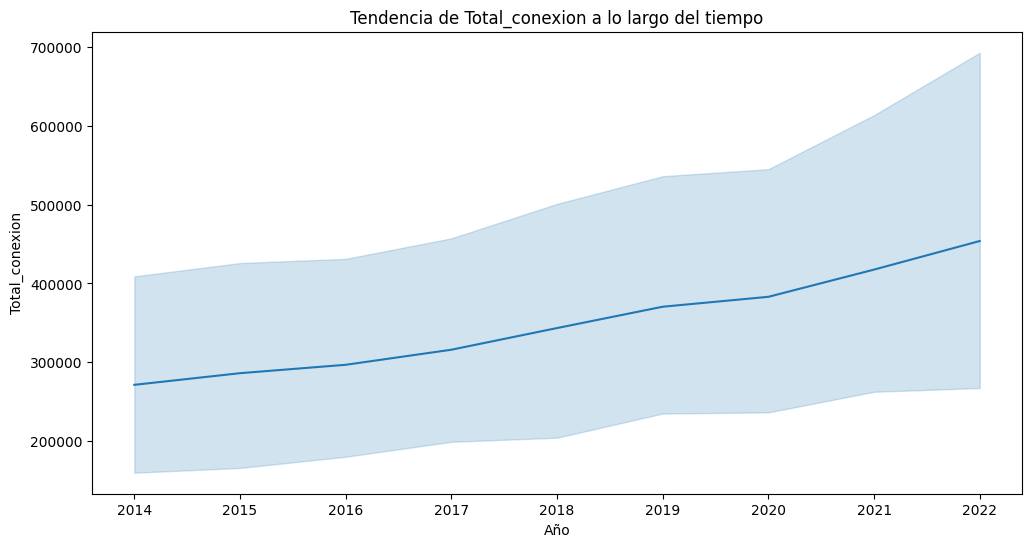

In [7]:
# Gráfico de línea de la variable "Total_conexion" en función del año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combinado, x='Año', y='Total_conexion')
plt.title('Tendencia de Total_conexion a lo largo del tiempo')
plt.show()


Vemos un incremento de las conexiones a lo largo de los registros. 

In [8]:
# Revisamos los datos de "Año", "Trimestre" y "Provincia"
cuenta_años = df_combinado['Año'].value_counts()
cuenta_trimestre = df_combinado['Trimestre'].value_counts()
cuenta_provincia = df_combinado['Provincia'].value_counts()

print("Recuento de valores en la columna 'Año':")
print(cuenta_años)
print("\nRecuento de valores en la columna 'Trimestre':")
print(cuenta_trimestre)
print("\nRecuento de valores en la columna 'Provincia':")
print(cuenta_provincia)

Recuento de valores en la columna 'Año':
Año
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
2022    72
Name: count, dtype: int64

Recuento de valores en la columna 'Trimestre':
Trimestre
3    216
2    216
1    216
4    192
Name: count, dtype: int64

Recuento de valores en la columna 'Provincia':
Provincia
Buenos Aires           35
Capital Federal        35
Tierra Del Fuego       35
Santiago Del Estero    35
Santa Fe               35
Santa Cruz             35
San Luis               35
San Juan               35
Salta                  35
Río Negro              35
Neuquén                35
Misiones               35
Mendoza                35
La Rioja               35
La Pampa               35
Jujuy                  35
Formosa                35
Entre Ríos             35
Corrientes             35
Córdoba                35
Chubut                 35
Chaco                  35
Catamarca              35
Tucumán                35
Name: count, dtype: int64


El año 2022 tiene la menor cantidad de registros (72), y tambien hay menor cantidad de datos para el 4to trimestre (192) respecto al valor de otros trimestres (216).  

Las variables:  

- **Accesos por cada 100 hab:** Número de accesos a Internet por cada 100 habitantes en la provincia para el año y trimestre específicos.

- **Accesos por cada 100 hogares:**  Número de accesos a Internet por cada 100 hogares en la provincia para el año y trimestre específicos.

In [9]:
# Revision de las variables
print(df_combinado['Accesos por cada 100 hab'].describe())
print(df_combinado['Accesos por cada 100 hogares'].describe())

count    840.000000
mean      14.658333
std        8.989528
min        3.000000
25%        8.000000
50%       13.000000
75%       19.000000
max       52.000000
Name: Accesos por cada 100 hab, dtype: float64
count    840.000000
mean      49.065750
std       23.151885
min        9.350000
25%       32.107500
50%       45.900000
75%       61.865000
max      124.060000
Name: Accesos por cada 100 hogares, dtype: float64


Al evaluar los estadísticos de los "accesos por cada 100 habitantes" tiene una media de 14.6 mientras que los "accesos por cada 100 hogares" es de 49.07, con un mayor valor de máximo y una mayor dispersión de los datos.  
 

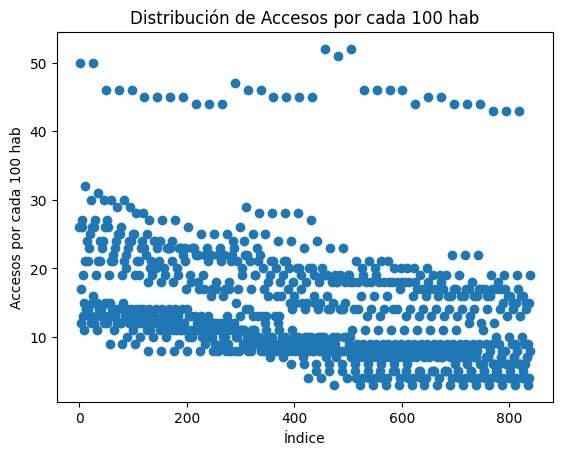

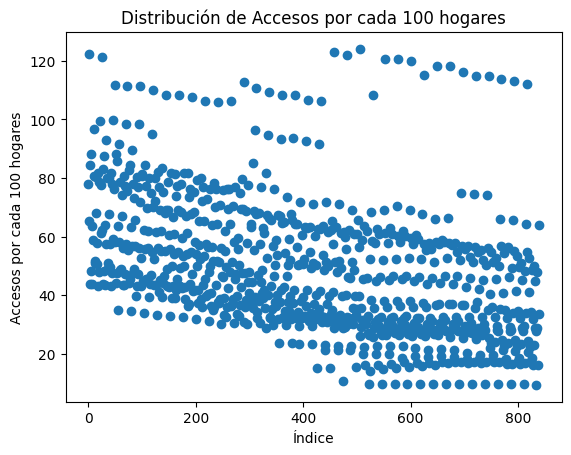

In [10]:
# De forma gráfica podemos notar la distribución de los datos: 
plt.plot(df_combinado['Accesos por cada 100 hab'], 'o')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Distribución de Accesos por cada 100 hab')
plt.show()

plt.plot(df_combinado['Accesos por cada 100 hogares'], 'o')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Distribución de Accesos por cada 100 hogares')
plt.show()

Revision de las variables:

- **Banda ancha fija:** Número de conexiones de banda ancha fija. Se refiere a conexiones a Internet de alta velocidad que tienen una capacidad de transmisión de datos mayor que las conexiones dial-up. Proporciona una mayor capacidad de carga y descarga de datos, lo que permite una experiencia de navegación y descarga más rápida. Hay varias tecnologías de banda ancha disponibles, como la fibra óptica, el cable coaxial, la tecnología DSL (Digital Subscriber Line) y la conexión inalámbrica, que incluye el acceso móvil y la banda ancha satelital. Estas tecnologías ofrecen velocidades de conexión mucho **más rápidas** en comparación con las conexiones dial-up.
- **Dial up:** Número de conexiones de tipo Dial up en la provincia para el año y trimestre específicos. Con una conexión dial-up, se utiliza un módem para establecer una conexión a través de la red telefónica con un proveedor de servicios de Internet (ISP). La velocidad de conexión es baja en comparación con las tecnologías más modernas, y generalmente se limita a velocidades de transmisión de datos de hasta 56 kilobits por segundo (Kbps). El acceso a Internet a través de dial-up ha sido ampliamente reemplazado por tecnologías de banda ancha más rápidas y confiables.



In [11]:
# Revision de las variables
print(df_combinado['Banda ancha fija'].describe())
print(df_combinado['Dial up'].describe())

count    8.400000e+02
mean     3.447674e+05
std      7.400503e+05
min      1.219300e+04
25%      5.192225e+04
50%      1.029360e+05
75%      1.778685e+05
max      4.715469e+06
Name: Banda ancha fija, dtype: float64
count      840.000000
mean       974.307143
std       2418.317775
min          0.000000
25%          9.000000
50%        148.000000
75%        619.000000
max      15229.000000
Name: Dial up, dtype: float64


La variable "Banda ancha" presenta mas dispersión y mayor promedio. 
Mientras que la variable "Dial up" cuenta con menores valores promedio y de distribución de valores. 

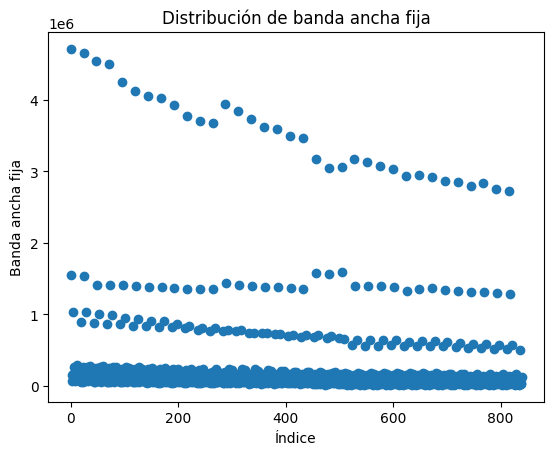

In [12]:
# De forma gráfica podemos notar la distribución de los datos: 
plt.plot(df_combinado['Banda ancha fija'], 'o')
plt.xlabel('Índice')
plt.ylabel('Banda ancha fija')
plt.title('Distribución de banda ancha fija')
plt.show()

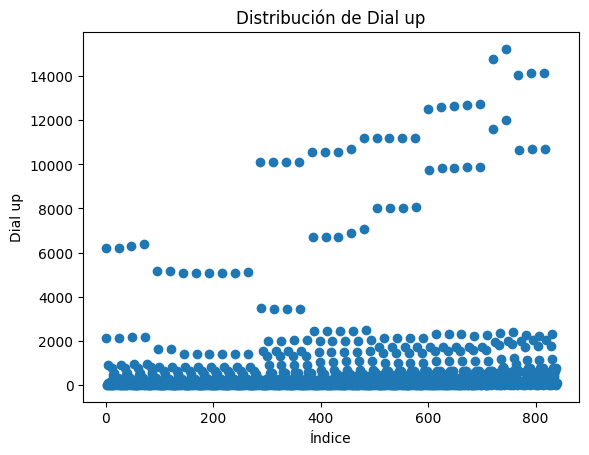

In [13]:
# De forma análoga con Dial up: 
plt.plot(df_combinado['Dial up'], 'o')
plt.xlabel('Índice')
plt.ylabel('Dial up')
plt.title('Distribución de Dial up')
plt.show()

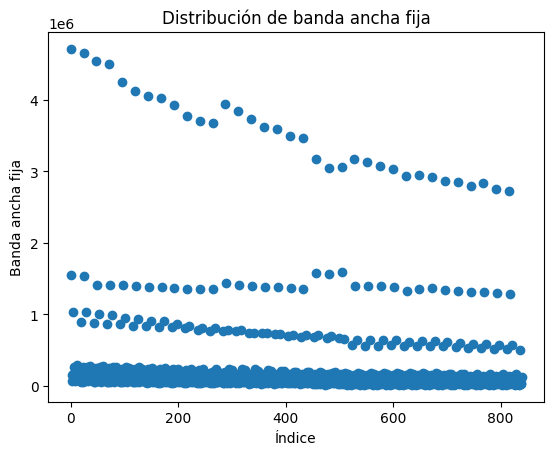

In [14]:
# De forma gráfica podemos notar la distribución de los datos: 
plt.plot(df_combinado['Banda ancha fija'], 'o')
plt.xlabel('Índice')
plt.ylabel('Banda ancha fija')
plt.title('Distribución de banda ancha fija')
plt.show()

Para las ultimas variables de este dataframe:
- **Hasta 512 kbps**
- **512 Kbps - 1 Mbps** 
- **1 Mbps - 6 Mbps**
- **6 Mbps - 10 Mbps**
- **10 Mbps - 20 Mbps**
- **20 Mbps - 30 Mbps**
- **30 Mbps**
- **Otros Mbps:** Número de conexiones con velocidad de otros tipos en cada provincia.
- **Total suma Mbps:** Total de la suma de todas las conexiones de Internet.

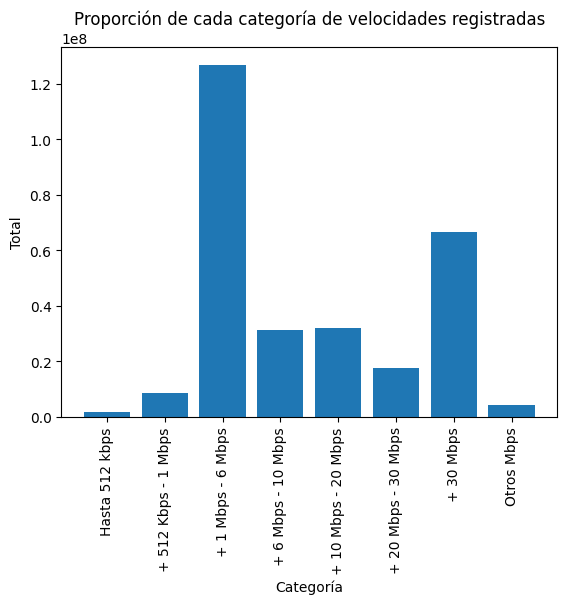

In [15]:
# De forma gráfica podemos ver la cantidad de cada velocidad registradas en el dataset
sizes = df_combinado[['Hasta 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                      '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros Mbps']].sum()

labels = sizes.index
values = sizes.values

plt.bar(labels, values)
plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Proporción de cada categoría de velocidades registradas')
plt.xticks(rotation=90)
plt.show()

En este caso la mayor cantidades de valores estan entre las velocidades de "1 a 6 Mbps" y "+ 30 Mbps".  

In [16]:
# De forma más profunda los análisis estadísticos de estas variables son:
estadistica_vel = df_combinado[['Hasta 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                           '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros Mbps', 'Total suma Mbps']].describe()

estadisticas_totales= pd.concat([estadistica_vel])
print(estadisticas_totales)


       Hasta 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
count      840.000000           840.000000       8.400000e+02   
mean      2086.426190         10142.846429       1.509700e+05   
std      13615.218242         22262.822375       3.481538e+05   
min          6.000000             0.000000       2.842000e+03   
25%         36.750000           307.000000       2.853925e+04   
50%        110.000000          2730.500000       4.883450e+04   
75%        568.000000          8130.250000       8.689750e+04   
max     238920.000000        171244.000000       2.299705e+06   

       + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  \
count          840.000000           840.000000           840.000000   
mean         37396.558333         38292.270238         20988.008333   
std          65406.204913         93996.489735         74792.113400   
min              0.000000             0.000000             0.000000   
25%           2795.500000          1360.500000            2

En este caso se puede resaltar que el mínimo de la variable "Otros Mbps" es -1945. 


## Analisis bivariado - multivariado

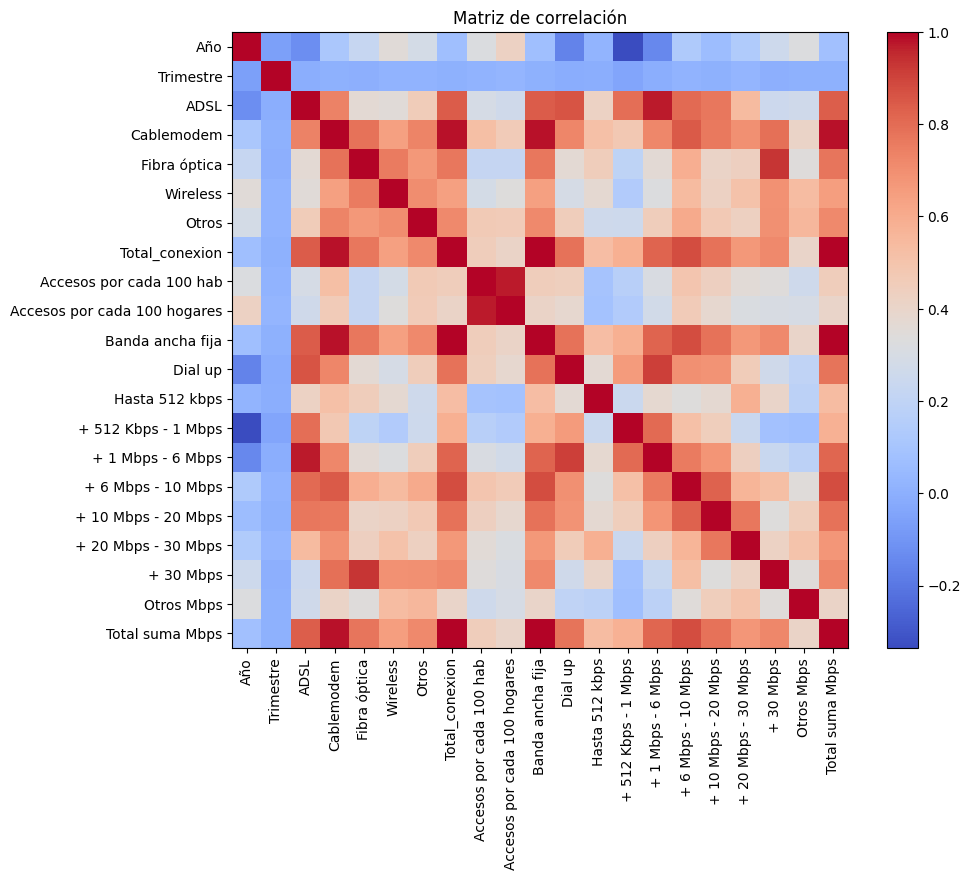

In [17]:
corr_matrix = df_combinado.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matriz de correlación')
plt.show()


Para observar mejor las correlaciones se agrupan como previamente fueron tratadas

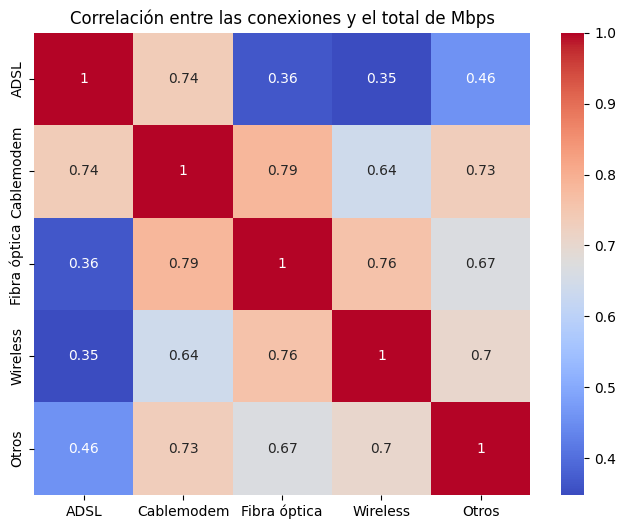

In [18]:
# Gráfico de correlación de las conexiones con el total de Mbps
conn_types = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_corr = df_combinado[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las conexiones y el total de Mbps')
plt.show()


In [19]:
# Otra forma de visualizar la correlacion de estas variables
variables = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
correlation_matrix = np.corrcoef(df_combinado[variables].values.T)

correlation_pairs = []
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        coef = correlation_matrix[i, j]
        pair = (variables[i], variables[j], coef)
        correlation_pairs.append(pair)
sorted_pairs = sorted(correlation_pairs, key=lambda x: x[2], reverse=True)
for pair in sorted_pairs:
    var1, var2, coef = pair
    print(f"Correlación de Pearson entre {var1} y {var2}: {coef:.2f}")

Correlación de Pearson entre Cablemodem y Fibra óptica: 0.79
Correlación de Pearson entre Fibra óptica y Wireless: 0.76
Correlación de Pearson entre ADSL y Cablemodem: 0.74
Correlación de Pearson entre Cablemodem y Otros: 0.73
Correlación de Pearson entre Wireless y Otros: 0.70
Correlación de Pearson entre Fibra óptica y Otros: 0.67
Correlación de Pearson entre Cablemodem y Wireless: 0.64
Correlación de Pearson entre ADSL y Otros: 0.46
Correlación de Pearson entre ADSL y Fibra óptica: 0.36
Correlación de Pearson entre ADSL y Wireless: 0.35


Algunas formas de conexión presentan nuemeros elevados de coeficiente de correlacion de Pearson entre varias parejas de variables, como Cablemodem y Fibra óptica, Fibra óptica y Wireless, ADSL y Cablemodem, entre otros. 

El análisis de estas conexiones a lo largo de los años nos va a mostrar un incremento de las conexiones "Cablemodem" y una marcada disminución de las conexiones "ADSL".

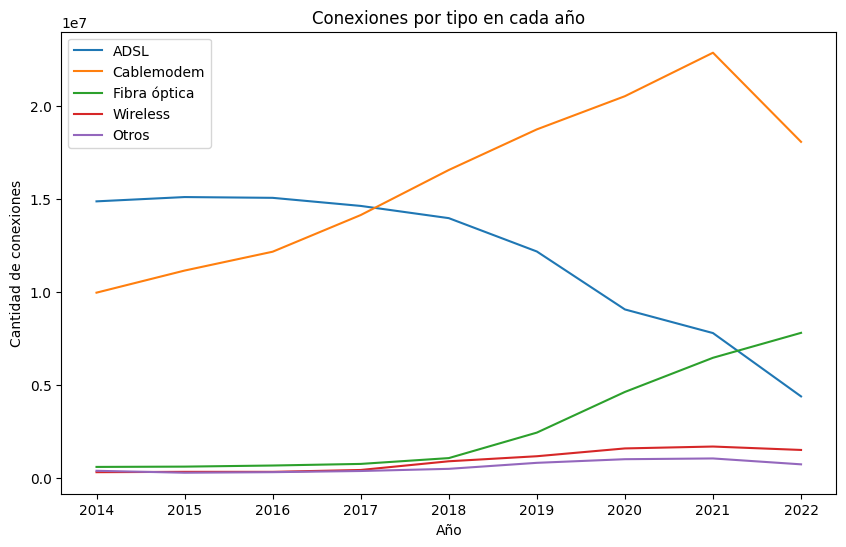

In [20]:
# Gráfico de líneas múltiples para comparar las conexiones por tipo en cada año
conn_types = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_conn_types = df_combinado[conn_types].groupby(df_combinado['Año']).sum()

plt.figure(figsize=(10, 6))
for conn_type in conn_types:
    plt.plot(df_conn_types.index, df_conn_types[conn_type], label=conn_type)

plt.title('Conexiones por tipo en cada año')
plt.xlabel('Año')
plt.ylabel('Cantidad de conexiones')
plt.legend(loc='upper left')
plt.show()

Análisis de los valores registrados para el último año

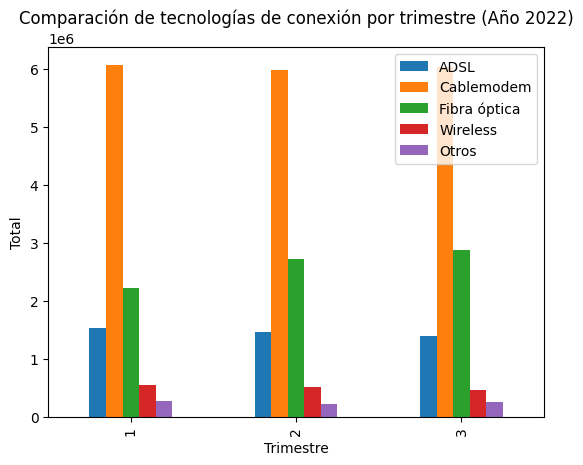

In [21]:
df_2022 = df_combinado[df_combinado['Año'] == 2022]

df_grouped = df_2022.groupby('Trimestre')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
df_grouped.plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Total')
plt.title('Comparación de tecnologías de conexión por trimestre (Año 2022)')
plt.show()


Notamos que hay una mayor preponderancia de conexiones de "Cablemodem", seguida por las de "Fibra óptica" 

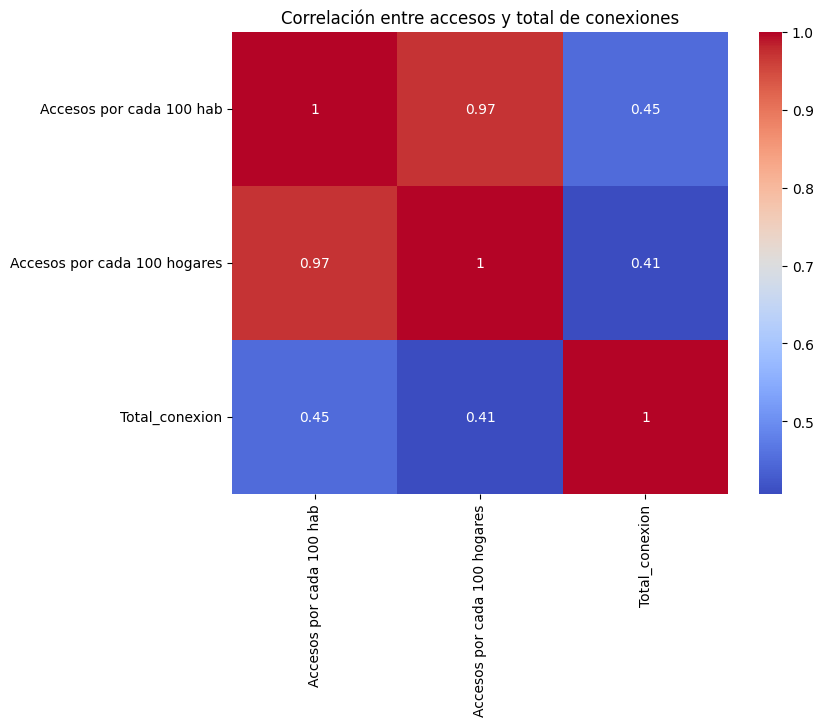

In [22]:
# Gráfico de correlación de los accesos
conn_types = ['Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Total_conexion']
df_corr = df_combinado[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre accesos y total de conexiones')
plt.show()


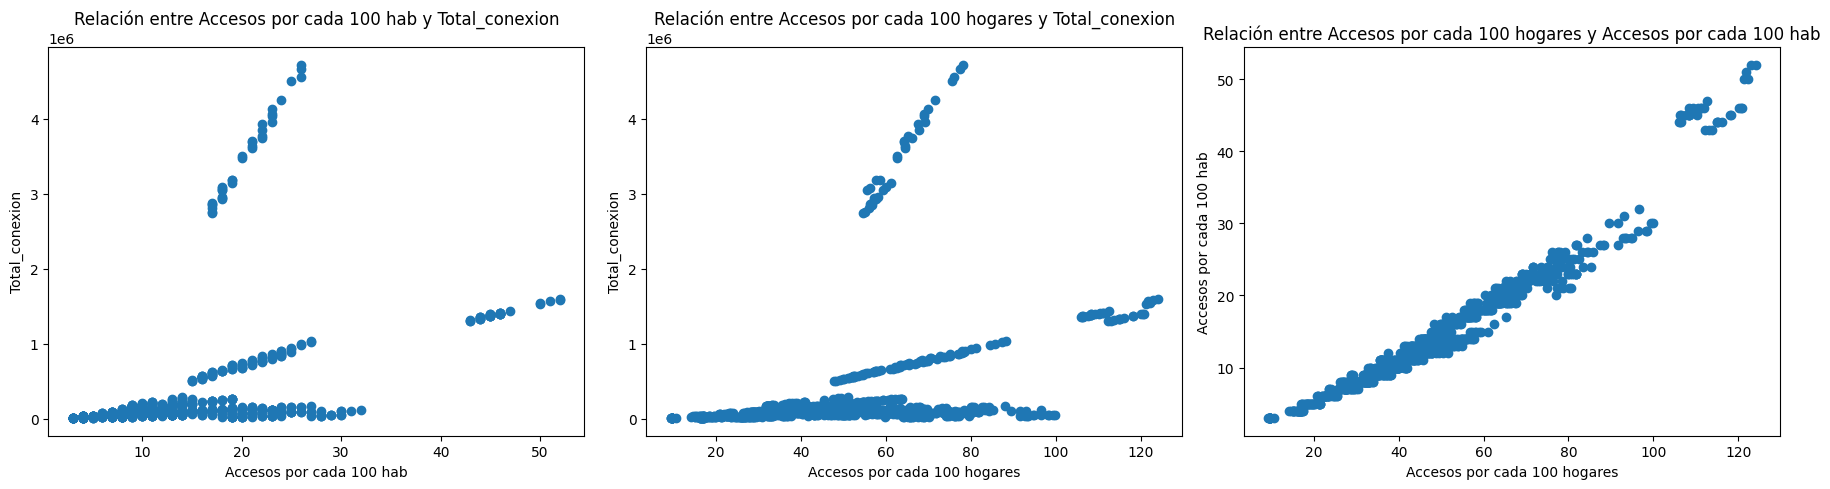

In [23]:
# De forma gráfica
# se crea una figura con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Primer gráfico
axes[0].scatter(df_combinado['Accesos por cada 100 hab'], df_combinado['Total_conexion'])
axes[0].set_xlabel('Accesos por cada 100 hab')
axes[0].set_ylabel('Total_conexion')
axes[0].set_title('Relación entre Accesos por cada 100 hab y Total_conexion')

# Segundo gráfico
axes[1].scatter(df_combinado['Accesos por cada 100 hogares'], df_combinado['Total_conexion'])
axes[1].set_xlabel('Accesos por cada 100 hogares')
axes[1].set_ylabel('Total_conexion')
axes[1].set_title('Relación entre Accesos por cada 100 hogares y Total_conexion')

# Tercer gráfico
axes[2].scatter(df_combinado['Accesos por cada 100 hogares'], df_combinado['Accesos por cada 100 hab'])
axes[2].set_xlabel('Accesos por cada 100 hogares')
axes[2].set_ylabel('Accesos por cada 100 hab')
axes[2].set_title('Relación entre Accesos por cada 100 hogares y Accesos por cada 100 hab')

# Ajustar los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

Habria una relación lineal entre los accesos por cada 100 hogares y los accesos por cada 100 habitantes.

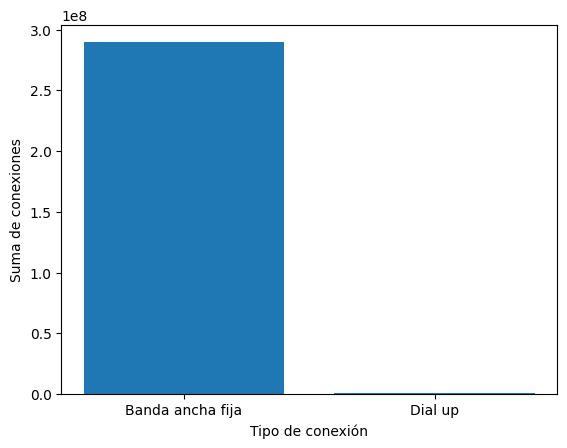

In [24]:
# Se calcula la suma de conexiones de "Banda ancha fija" y "Dial up"
suma_banda_ancha = df_combinado["Banda ancha fija"].sum()
suma_dial_up = df_combinado["Dial up"].sum()

# El grafico
plt.bar(["Banda ancha fija", "Dial up"], [suma_banda_ancha, suma_dial_up])
plt.xlabel("Tipo de conexión")
plt.ylabel("Suma de conexiones")
plt.show()

Hay mayor cantidad de conexiones de banda ancha

In [25]:
# La correlación entre "Banda ancha fija" y "Dial up"
correlation = df_combinado["Banda ancha fija"].corr(df_combinado["Dial up"])
print("Correlación: ", correlation)

Correlación:  0.7822577585195165


Y parecen tener una correlación positiva entre sus valores

In [26]:
# Realizar la prueba t de Student entre "Banda ancha fija" y "Dial up"
t_stat, p_value = ttest_ind(df_combinado["Banda ancha fija"], df_combinado["Dial up"])

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

Estadístico t: 13.463972199094824
Valor p: 2.588621191551492e-39


Con una clara diferencia significativa entre las medias de las variables "Banda ancha fija" y "Dial up", y esta diferencia no se puede atribuir simplemente al azar.

<Axes: >

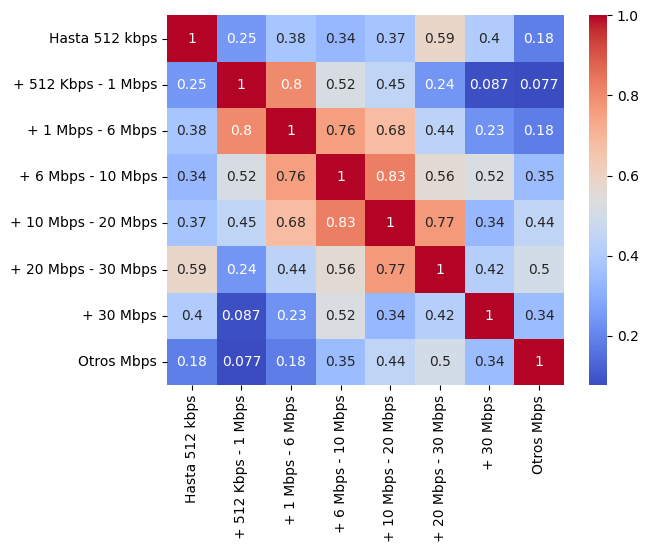

In [27]:
# Se arma un subconjunto del DataFrame con las variables de interés
subset = df_combinado[['Hasta 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros Mbps']]

# Calcular la matriz de correlación
correlation_matrix = subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")


Hay algunas velocidades que parecerían tener algún grado de correlación 

_________________________________________________________________________________________________________

# Dataframe: "df_nacional"

El DataFrame "df_nacional" contiene información sobre las conexiones de Internet en diferentes provincias a lo largo de varios años y trimestres a nivel nacional. 

In [28]:
# Carga del archivo:
df_nacional = pd.read_csv(r"df_nacional.csv")
df_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        35 non-null     int64  
 1   Trimestre                  35 non-null     int64  
 2   Banda ancha fija           35 non-null     int64  
 3   Dial up                    35 non-null     int64  
 4   Mbps (Media de bajada)     35 non-null     float64
 5   Hasta 512 kbps             35 non-null     float64
 6   Entre 512 Kbps y 1 Mbps    35 non-null     float64
 7   Entre 1 Mbps y 6 Mbps      35 non-null     float64
 8   Entre 6 Mbps y 10 Mbps     35 non-null     float64
 9   Entre 10 Mbps y 20 Mbps    35 non-null     float64
 10  Entre 20 Mbps y 30 Mbps    35 non-null     float64
 11  Más de 30 Mbps             35 non-null     float64
 12  Otros Mbps                 35 non-null     float64
 13  Ingresos (miles de pesos)  35 non-null     int64  
 

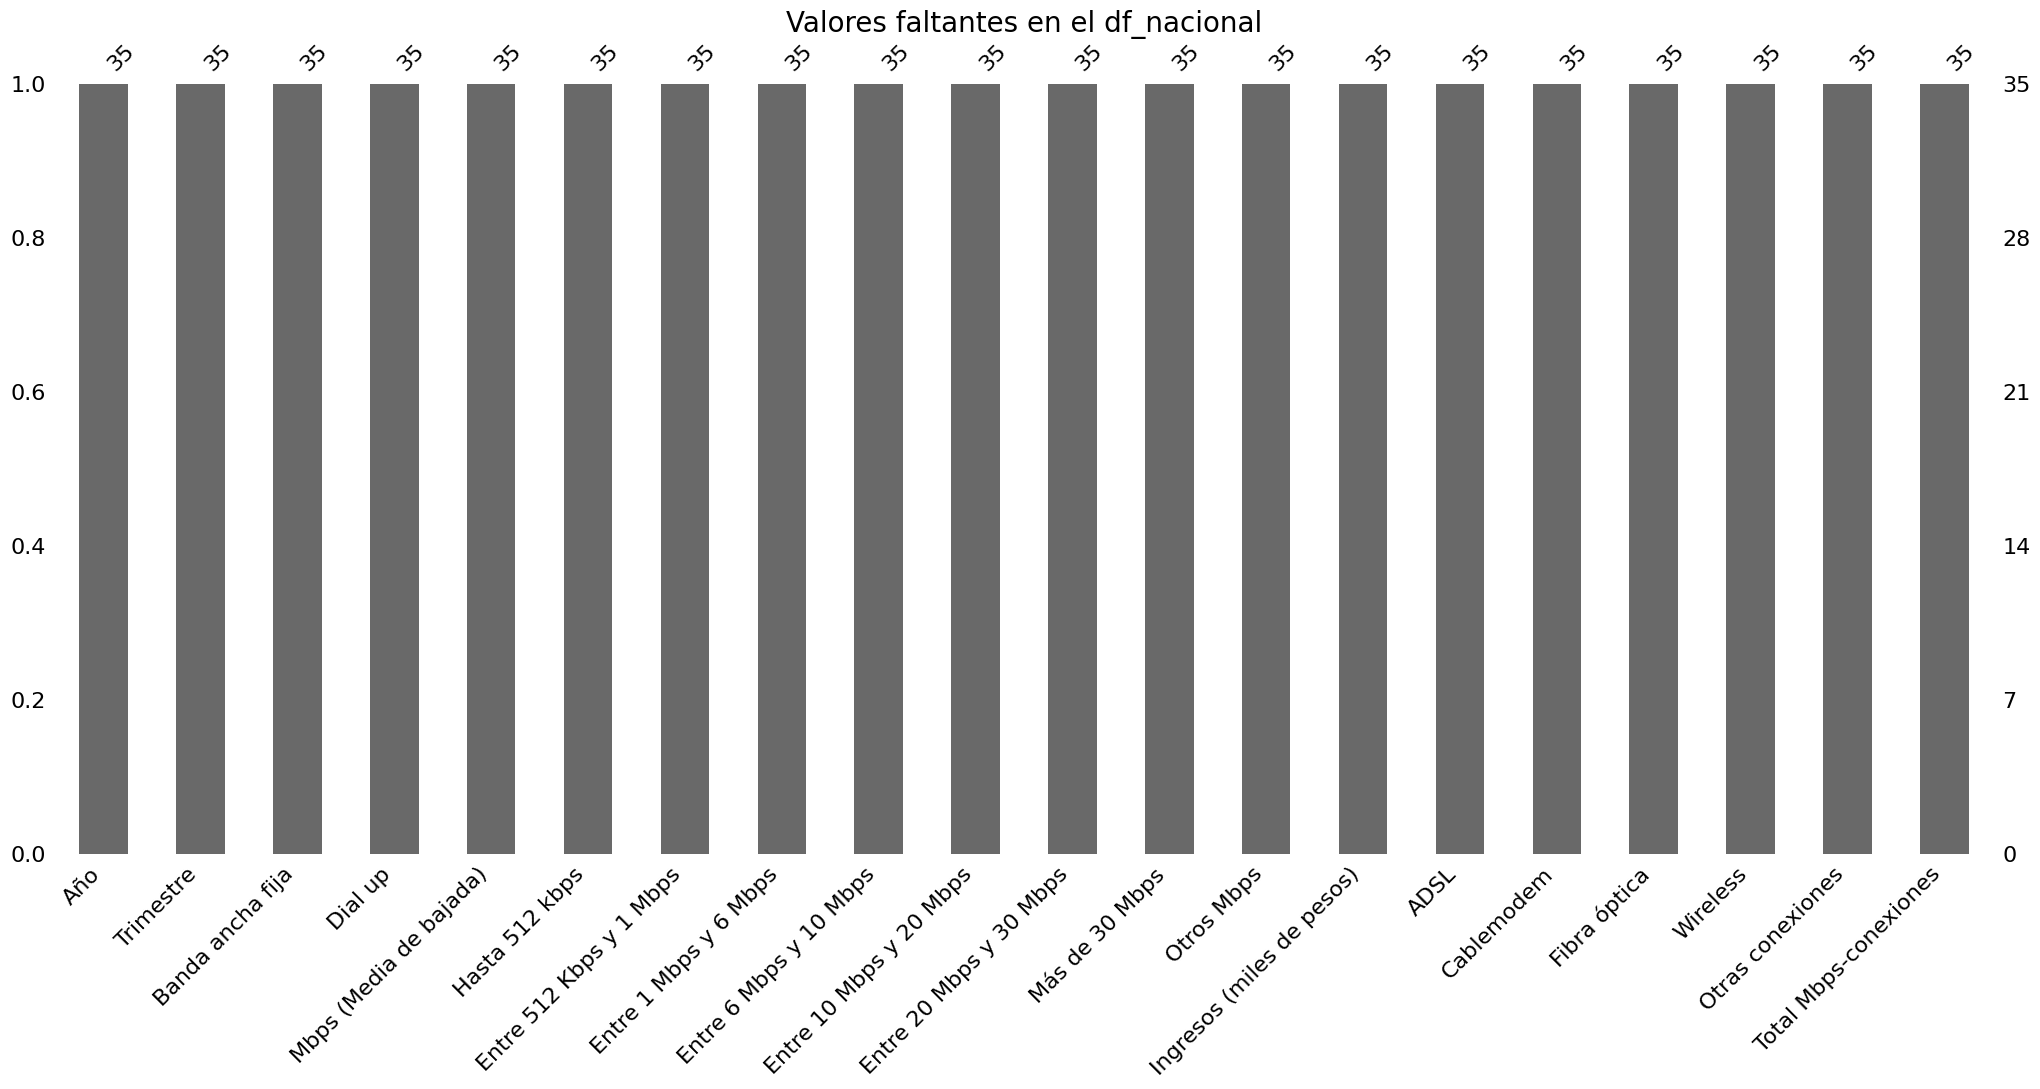

In [29]:
# Revisamos los valores faltantes del df
msno.bar(df_nacional)
plt.title('Valores faltantes en el df_nacional', fontsize=20) 
plt.show() # nuevamente vemos que no hay valores faltantes

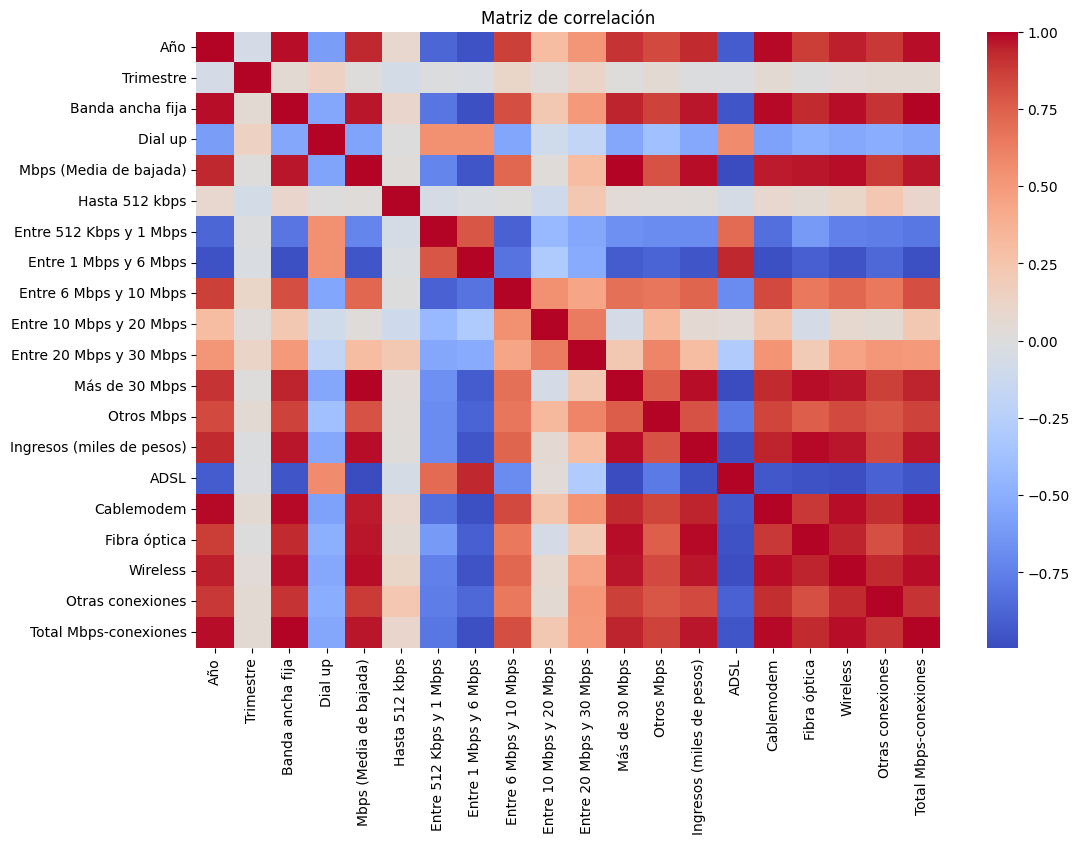

In [30]:
# Si se ejecuta la correlacion para las variables numericas
df_numeric = df_nacional.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Se ve una zona de mayor correlación por lo que se profundiza en ellas:

In [31]:
# Se visualizan los estadísticos de las columnas de los tipos de conexión
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_estadisticos = df_nacional[columnas].describe()
print(df_estadisticos)

               ADSL    Cablemodem  Fibra óptica       Wireless  \
count  3.500000e+01  3.500000e+01  3.500000e+01      35.000000   
mean   3.040425e+06  4.122601e+06  7.390627e+05  248280.028571   
std    8.354122e+05  1.225277e+06  7.861772e+05  174354.292929   
min    1.395277e+06  2.407330e+06  1.391870e+05   70749.000000   
25%    2.279711e+06  2.966749e+06  1.679880e+05   85107.500000   
50%    3.557216e+06  4.038141e+06  2.262850e+05  194267.000000   
75%    3.723156e+06  5.132233e+06  1.138802e+06  394963.000000   
max    3.803024e+06  6.073426e+06  2.871541e+06  557110.000000   

       Otras conexiones  
count         35.000000  
mean      147431.085714  
std        85868.716764  
min        54300.000000  
25%        62763.500000  
50%       100554.000000  
75%       247918.500000  
max       265328.000000  


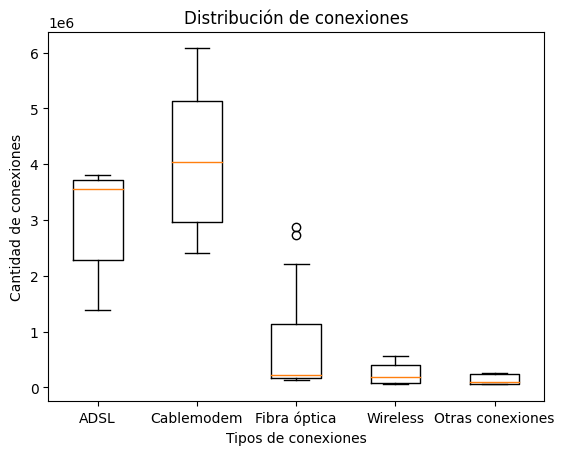

In [32]:
# De forma gráfica:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
plt.boxplot(df_nacional[columnas])
plt.ylabel('Cantidad de conexiones')
plt.xlabel('Tipos de conexiones')
plt.title('Distribución de conexiones')
plt.xticks(range(1, len(columnas) + 1), columnas)
plt.show()

Tal como se observó en el dataset "df_combinado", hay mayores valores para las conexiones de "cable modem", seguida por "ADSL" y "Fibra óptica". 

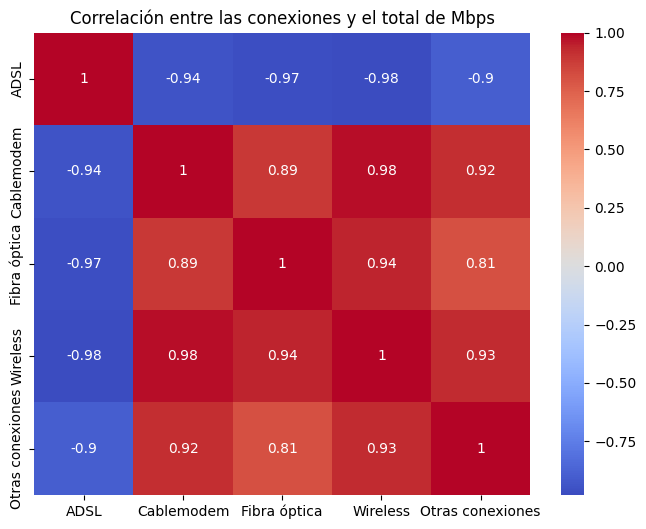

In [33]:
# Gráfico de correlación de las conexiones con el total de Mbps
conn_types =  ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_corr = df_nacional[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las conexiones y el total de Mbps')
plt.show()


Las variables parecen tener un mayor nivel de correlación, exceptuando ADSL con todas las variables con las que presenta una clara correlacion negativa. 

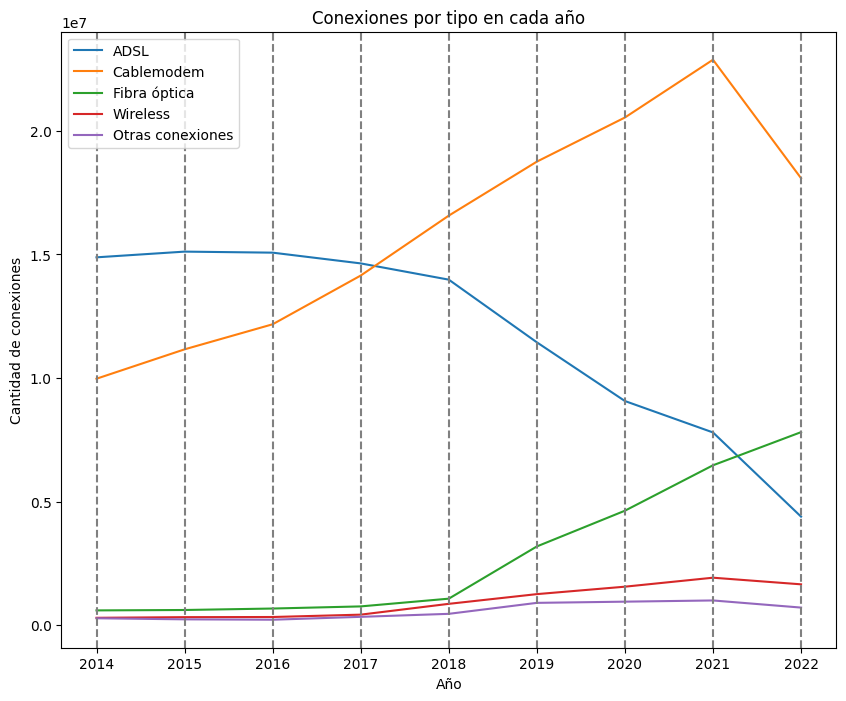

In [34]:
# Gráfico de líneas múltiples para comparar las conexiones por tipo en cada año
conn_types =  ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_conn_types = df_nacional[conn_types].groupby(df_nacional['Año']).sum()

plt.figure(figsize=(10, 8))
for conn_type in conn_types:
    plt.plot(df_conn_types.index, df_conn_types[conn_type], label=conn_type)

plt.title('Conexiones por tipo en cada año')
plt.xlabel('Año')
plt.ylabel('Cantidad de conexiones')
plt.legend(loc='upper left')

# Agregar líneas verticales de las etiquetas del eje x
for year in df_conn_types.index:
    plt.axvline(x=year, color='gray', linestyle='--')

plt.show()


Coincide con los valores obtenidos previamente a nivel de las provincias

____________________________________________________________________________________________________________________

# Dataframe: "df_partidos"

El DataFrame "df_partidos" contiene información sobre las conexiones de Internet en diferentes provincias e incluso partidos y localidades a lo largo de varios años y trimestres a nivel nacional. 

In [73]:
# Carga del archivo:
df_partidos = pd.read_csv(r"df_partidos.csv")
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Provincia         2993 non-null   object
 1   Partido           2993 non-null   object
 2   Localidad         2993 non-null   object
 3   ADSL              2993 non-null   int64 
 4   CableModem        2993 non-null   int64 
 5   Dial Up           2993 non-null   int64 
 6   Fibra Optica      2993 non-null   int64 
 7   Otras conexiones  2993 non-null   int64 
 8   Satelital         2993 non-null   int64 
 9   WIMAX             2993 non-null   int64 
 10  Wireless          2993 non-null   int64 
 11  Total general     2993 non-null   int64 
 12  Poblacion         2993 non-null   int64 
 13  Telefonia Fija    2993 non-null   object
 14  Latitud           2993 non-null   object
 15  Longitud          2993 non-null   object
dtypes: int64(10), object(6)
memory usage: 374.3+ KB


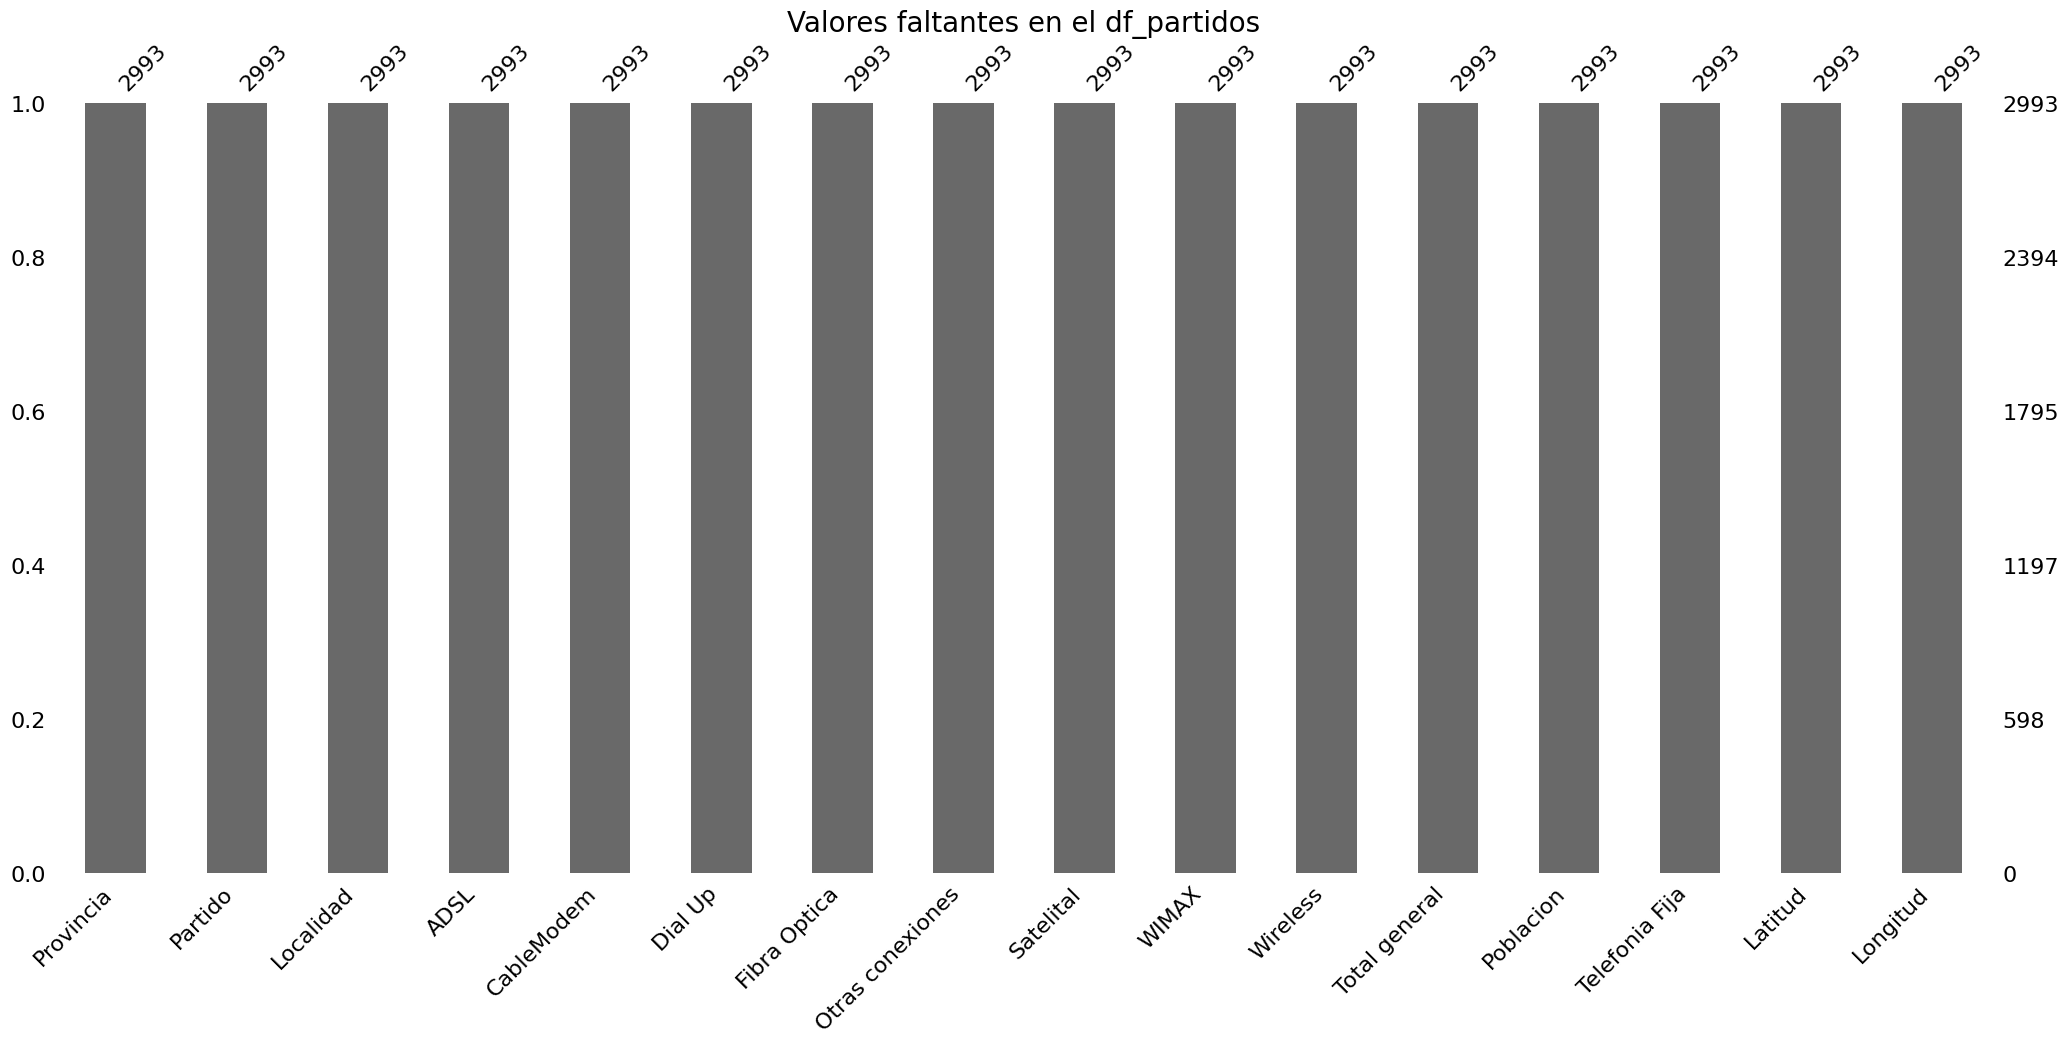

In [37]:
# Revisamos los valores faltantes del df
msno.bar(df_partidos)
plt.title('Valores faltantes en el df_partidos', fontsize=20) 
plt.show()  # no parece tener valores faltantes

No hay datos faltantes en este dataframe, pero carece de información de la fecha (año, trimestre) en que fueron generados. 
Contiene los datos georeferenciados por latitud y longitud.

In [38]:
# Para obtener el resumen estadístico descriptivo de las variables numéricas
df_partidos.describe()


,ADSL,CableModem,Dial Up,Fibra Optica,Otras conexiones,Satelital,WIMAX,Wireless,Total general,Poblacion
count,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2.993000e+03
mean,414.385900,1582.412295,3.387905,901.349482,45.643502,1.021049,0.555630,181.584698,3130.340461,1.130128e+04
std,2115.778853,8728.842170,23.736216,5908.888793,466.010540,17.920275,12.915746,693.696695,15721.791554,4.453420e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.130000e+02
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,151.000000,1.230000e+03
75%,122.000000,16.000000,0.000000,56.000000,0.000000,1.000000,0.000000,116.000000,994.000000,5.634000e+03
max,58016.000000,222667.000000,537.000000,208950.000000,15215.000000,975.000000,437.000000,18447.000000,495182.000000,1.317298e+06


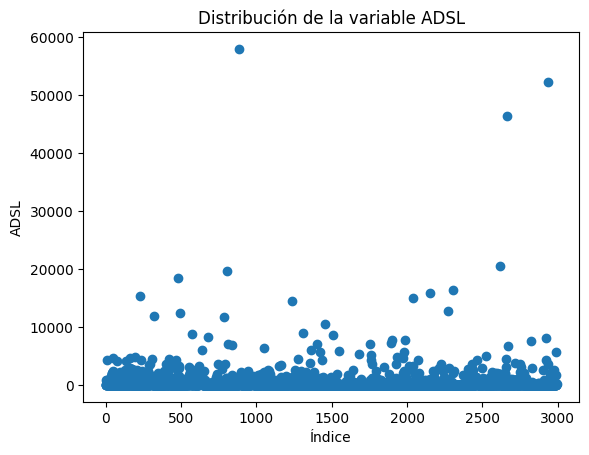

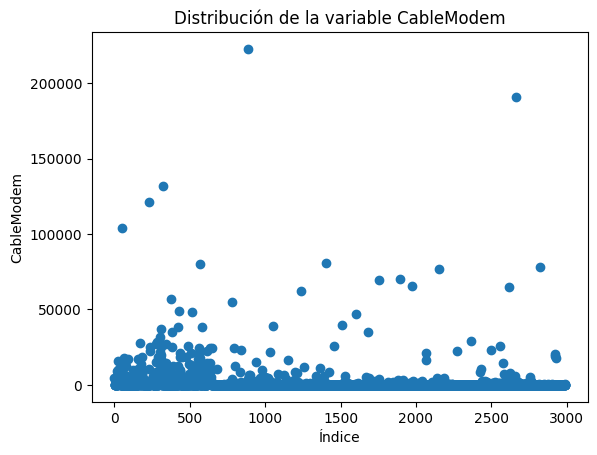

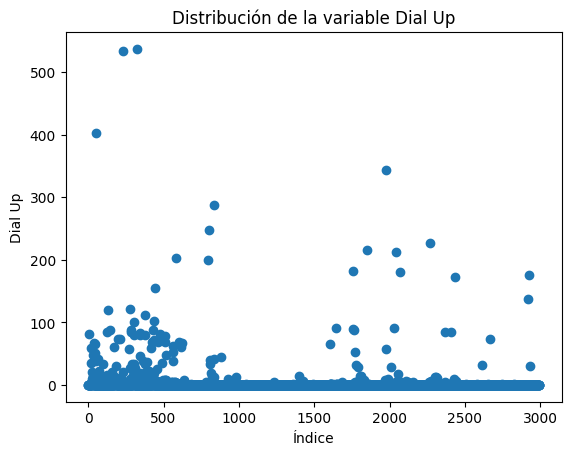

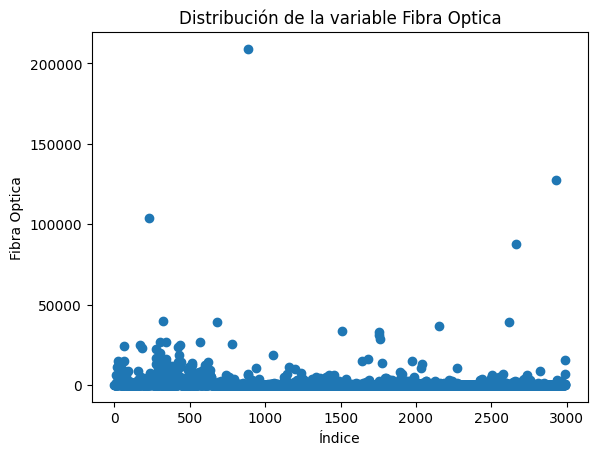

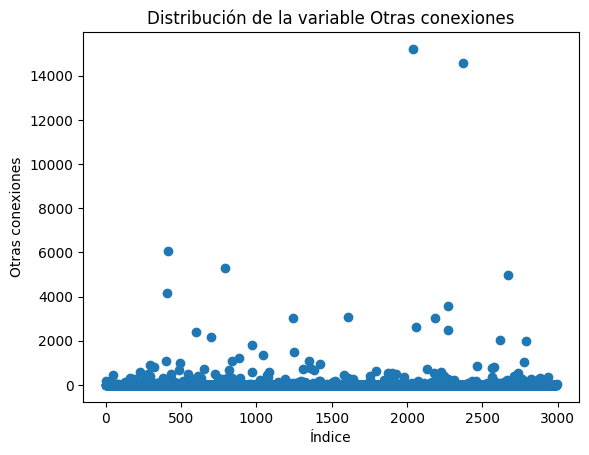

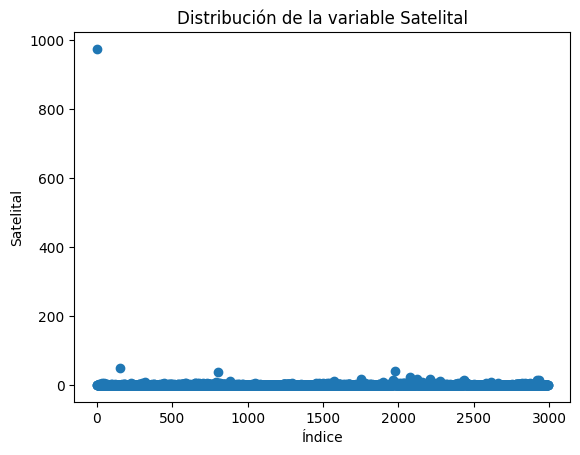

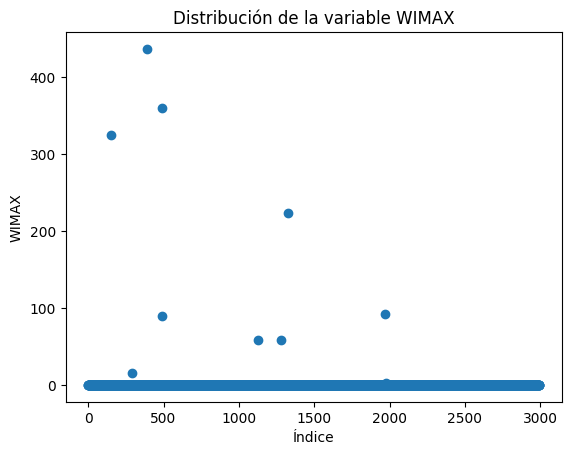

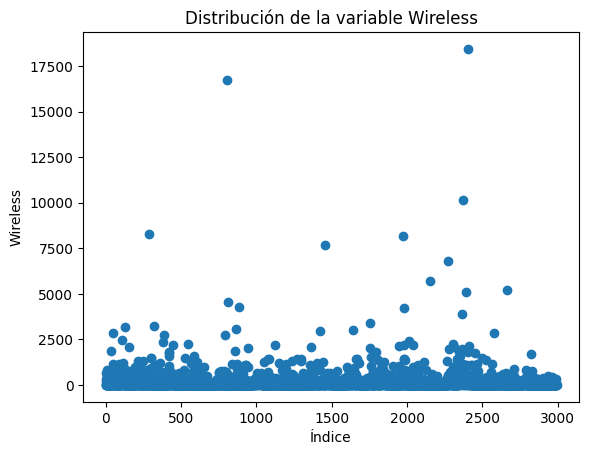

In [39]:
# Lista de columnas para analizar
columnas = ['ADSL', 'CableModem', 'Dial Up', 'Fibra Optica', 'Otras conexiones', 'Satelital', 'WIMAX', 'Wireless']

# Iterar sobre las columnas y generar gráficos de dispersión
for columna in columnas:
    plt.scatter(range(len(df_partidos)), df_partidos[columna])
    plt.xlabel('Índice')
    plt.ylabel(columna)
    plt.title(f'Distribución de la variable {columna}')
    plt.show()


Observamos que en general los datos se encuentran concentrados dentro del estrato mas bajo de los valores. 

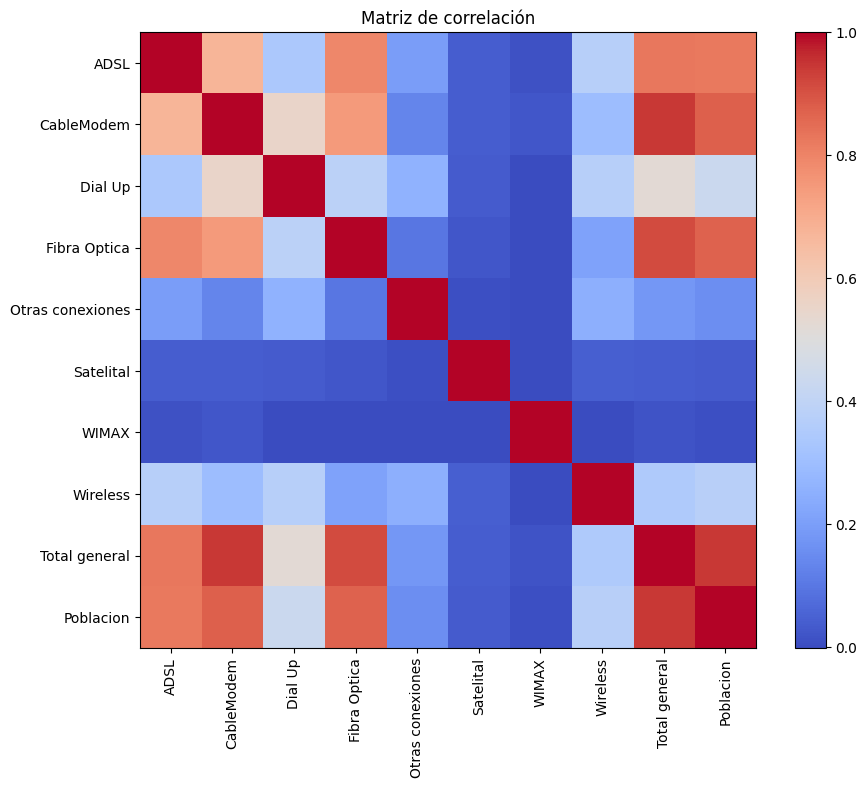

In [40]:
corr_matrix = df_partidos.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Matriz de correlación')
plt.show()


En este caso parece haber una clara correlacion negativa de las variables respecto a "Satelital" y "Wimax"

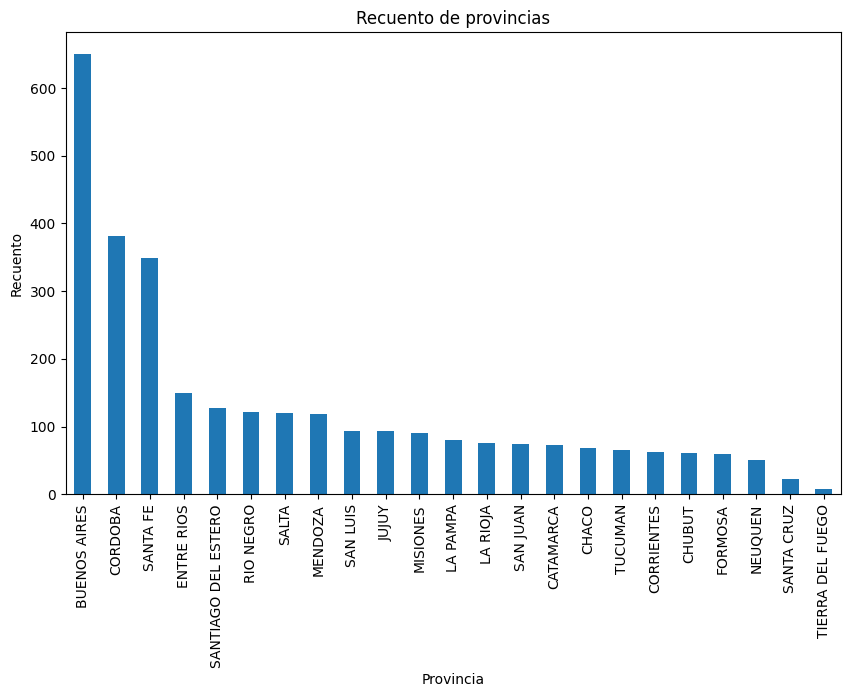

In [41]:
# Recuento de provincias
cuenta_provincia = df_partidos['Provincia'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
cuenta_provincia.plot(kind='bar')
plt.xlabel('Provincia')
plt.ylabel('Recuento')
plt.title('Recuento de provincias')
plt.show()


Podemos notar que hay mayor información procedente de Bs.As., Córdoba y Santa Fe

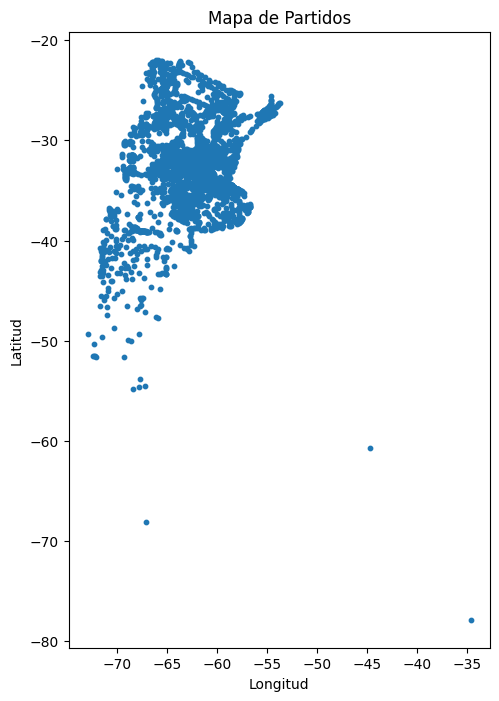

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt

df_partidos['Latitud'] = df_partidos['Latitud'].apply(lambda x: str(x).replace('..', '.')).astype(float)
df_partidos['Longitud'] = df_partidos['Longitud'].apply(lambda x: str(x).replace('..', '.')).astype(float)

#df_partidos['Latitud'] = df_partidos['Latitud'].str.replace('..', '.')
#df_partidos['Longitud'] = df_partidos['Longitud'].str.replace('..', '.')
#df_partidos['Latitud'] = df_partidos['Latitud'].astype(float)
#df_partidos['Longitud'] = df_partidos['Longitud'].astype(float)


# Crear un objeto GeoDataFrame a partir de las columnas "Latitud" y "Longitud"
geometry = gpd.points_from_xy(df_partidos['Longitud'], df_partidos['Latitud'])
gdf = gpd.GeoDataFrame(df_partidos, geometry=geometry)

# Crear el mapa
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, markersize=10)

# Añadir título y etiquetas
ax.set_title('Mapa de Partidos')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()


Algunas coordenadas del datset se encuentran registradas con error por lo que los puntos correspondientes a esas localidades, escapan del mapa. 

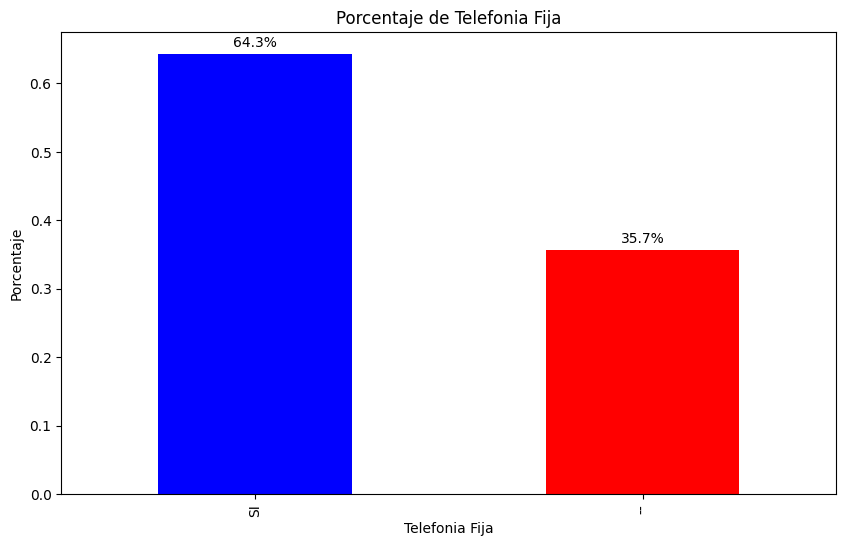

In [88]:
colores = ['blue', 'red']
plt.figure(figsize=(10, 6))
counts = df_partidos['Telefonia Fija'].value_counts(normalize=True)
ax = counts.plot(kind='bar', color=colores)

# Mostrar porcentajes en las etiquetas de las barras
for i, count in enumerate(counts):
    ax.text(i, count + 0.01, f'{count*100:.1f}%', ha='center')

plt.xlabel('Telefonia Fija')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Telefonia Fija')
plt.show()


Podemos notar que el mayor porcentaje de usuarios cuenta con telefonía fija.

________________________________________________________________________

# Dataframe: "df_indicadores"

In [45]:
# Carga del archivo:
df_indicadores = pd.read_csv(r"df_indicadores.csv")
df_indicadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año             22 non-null     int64  
 1   Trimestre       22 non-null     int64  
 2   IPC US          22 non-null     int64  
 3   IPC AR          22 non-null     int64  
 4   USDARS oficial  22 non-null     float64
 5   USDARS blue     22 non-null     float64
 6   PBI millones    22 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 1.3 KB


In [114]:
estadisticas_ind = df_indicadores[['Año', 'Trimestre']].describe()
print(estadisticas_ind)


               Año  Trimestre
count    22.000000  22.000000
mean   2015.272727   2.409091
std       1.638287   1.140555
min    2013.000000   1.000000
25%    2014.000000   1.250000
50%    2015.000000   2.000000
75%    2016.750000   3.000000
max    2018.000000   4.000000


In [94]:
unique_years = df_indicadores['Año'].nunique()
print(f"Número de años únicos: {unique_years}")

Número de años únicos: 6


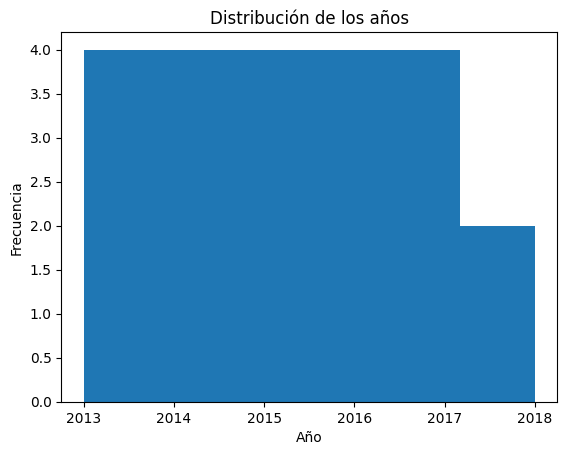

In [97]:
plt.hist(df_indicadores['Año'], bins='auto')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de los años')
plt.show()

In [117]:
estad_ind = df_indicadores[['IPC US','IPC AR']].describe()
print(estad_ind)


              IPC US       IPC AR
count      22.000000    22.000000
mean   239811.500000   657.000000
std      5470.373764   268.532697
min    232773.000000   298.000000
25%    236162.500000   440.000000
50%    238237.500000   602.500000
75%    243208.750000   868.250000
max    251989.000000  1169.000000


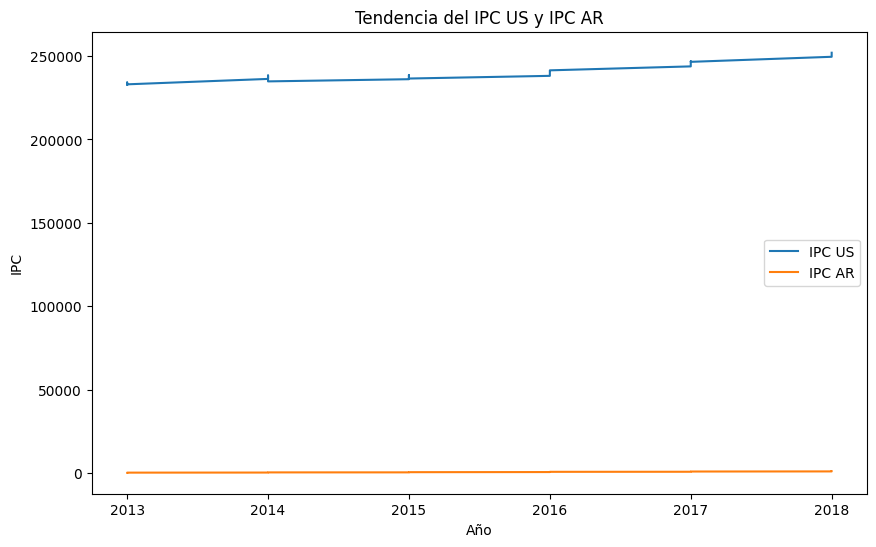

In [156]:
plt.figure(figsize=(10, 6))
plt.plot(df_indicadores['Año'], df_indicadores['IPC US'], label='IPC US')
plt.plot(df_indicadores['Año'], df_indicadores['IPC AR'], label='IPC AR')
plt.xlabel('Año')
plt.ylabel('IPC')
plt.title('Tendencia del IPC US y IPC AR')
plt.legend()
plt.show()

Si se encuentran en el mismo gráfico y las mismas coordenadas no parece haber diferencia a lo largo de los años. De manera que se busca otra forma de expresar los resultados.

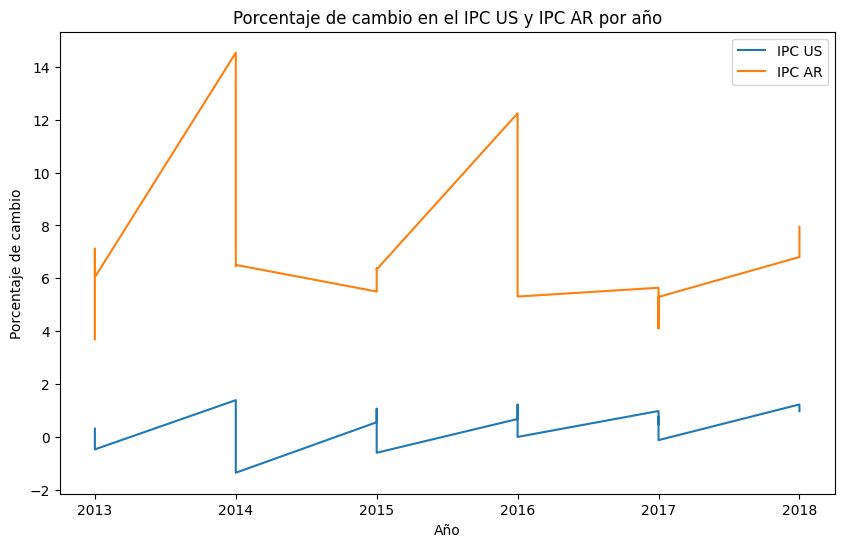

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(df_indicadores['Año'], df_indicadores['IPC US'].pct_change() * 100, label='IPC US')
plt.plot(df_indicadores['Año'], df_indicadores['IPC AR'].pct_change() * 100, label='IPC AR')
plt.xlabel('Año')
plt.ylabel('Porcentaje de cambio')
plt.title('Porcentaje de cambio en el IPC US y IPC AR por año')
plt.legend()
plt.show()


El porcentaje de cambio parece ser mayor para IPC AR

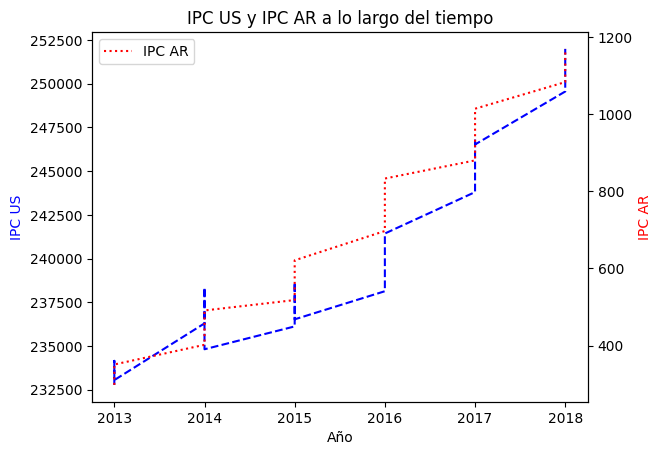

In [133]:
fig, ax1 = plt.subplots()

ax1.plot(df_indicadores['Año'], df_indicadores['IPC US'], label='IPC US', color='blue', linestyle='--')
ax1.set_xlabel('Año')
ax1.set_ylabel('IPC US', color='blue')

ax2 = ax1.twinx()
ax2.plot(df_indicadores['Año'], df_indicadores['IPC AR'], label='IPC AR', color='red', linestyle=':')
ax2.set_ylabel('IPC AR', color='red')

plt.title('IPC US y IPC AR a lo largo del tiempo')
plt.legend()
plt.show()


Podemos evaluar esta tendencia a lo largo de los trimestres

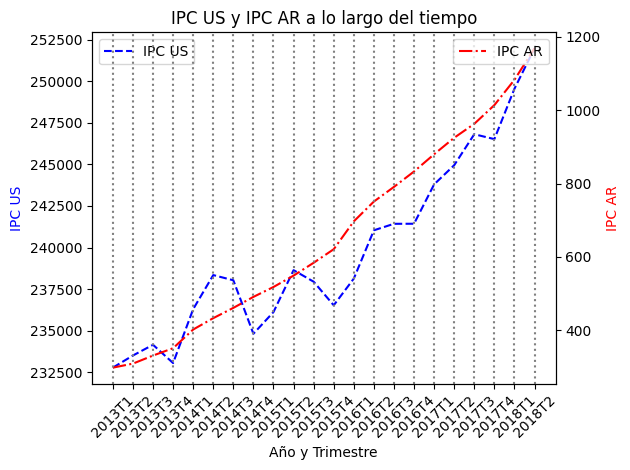

In [149]:
import matplotlib.pyplot as plt

# Agrupar los datos por año y trimestre
grouped = df_indicadores.groupby(['Año', 'Trimestre'])

# Crear una lista de etiquetas para cada trimestre
xticks = [f'{año}T{trimestre}' for (año, trimestre), _ in grouped]

fig, ax1 = plt.subplots()

ax1.plot(xticks, df_indicadores['IPC US'], label='IPC US', color='blue', linestyle='--')
ax1.set_xlabel('Año y Trimestre')
ax1.set_ylabel('IPC US', color='blue')

ax2 = ax1.twinx()
ax2.plot(xticks, df_indicadores['IPC AR'], label='IPC AR', color='red', linestyle='-.')
ax2.set_ylabel('IPC AR', color='red')

plt.title('IPC US y IPC AR a lo largo del tiempo')

# Mostrar la leyenda de ambas variables
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar las etiquetas del eje x en un ángulo específico
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)  # Ángulo de rotación en grados

# Colocar líneas verticales grises en las posiciones de las etiquetas del eje x
for i, xtick in enumerate(xticks):
    plt.axvline(i, color='gray', linestyle='dotted')

plt.tight_layout()
plt.show()




- IPC US: El IPC US (Índice de Precios al Consumidor de Estados Unidos) es un indicador que mide los cambios en los precios de una cesta de bienes y servicios representativos para el consumidor promedio en Estados Unidos. El IPC US es utilizado para monitorear la inflación y proporciona información sobre el costo de vida y el poder adquisitivo de los consumidores en el país.

- IPC AR: El IPC AR (Índice de Precios al Consumidor de Argentina) es un indicador similar al IPC US, pero específico para Argentina. El IPC AR mide los cambios en los precios de bienes y servicios representativos en Argentina y se utiliza para evaluar la inflación y el impacto en el costo de vida de los consumidores argentinos.

En ambos casos, manifiestan una tendencia a incrementarse a lo largo de los años (aunque se encuentran en distintos ordenes los valores de cada variable)
Esto indica la inflación global, la cual es un fenómeno económico caracterizado por el aumento sostenido y generalizado de los precios de bienes y servicios en una economía durante un período de tiempo. Si tanto el IPC US como el IPC AR muestran un incremento a lo largo de los años, es probable que los precios estén aumentando en ambos países, lo que implica que la misma cantidad de dinero puede comprar menos bienes y servicios con el tiempo.

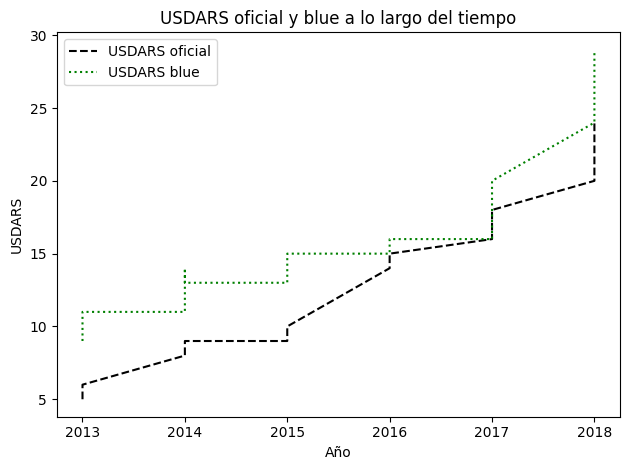

In [154]:
fig, ax1 = plt.subplots()

ax1.plot(df_indicadores['Año'], df_indicadores['USDARS oficial'], label='USDARS oficial', color='black', linestyle='--')
ax1.plot(df_indicadores['Año'], df_indicadores['USDARS blue'], label='USDARS blue', color='green', linestyle=':')
ax1.set_xlabel('Año')
ax1.set_ylabel('USDARS')
ax1.set_title('USDARS oficial y blue a lo largo del tiempo')

plt.legend()
plt.tight_layout()
plt.show()


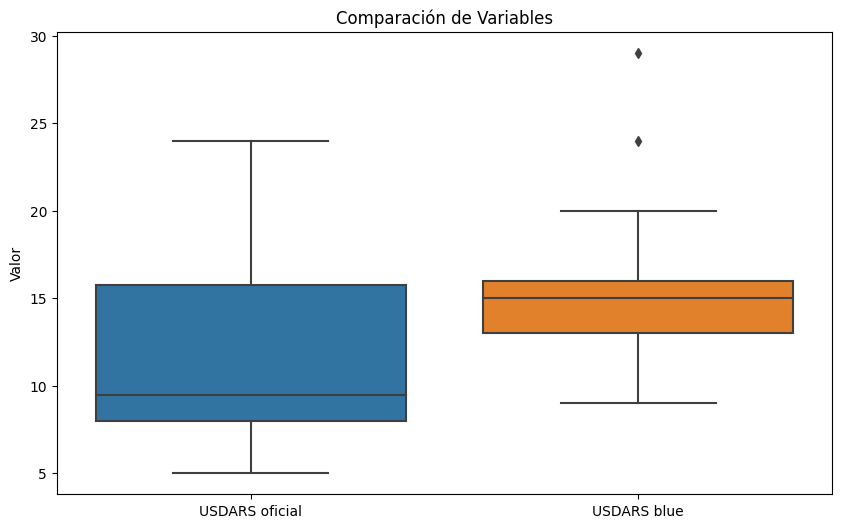

In [159]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_indicadores[['USDARS oficial', 'USDARS blue']])
plt.ylabel('Valor')
plt.title('Comparación de Variables')
plt.show()

En este caso se puede notar que el valor del "dolar blue" en general presenta un valor mayor respecto al "dolar oficial" en nuestro país

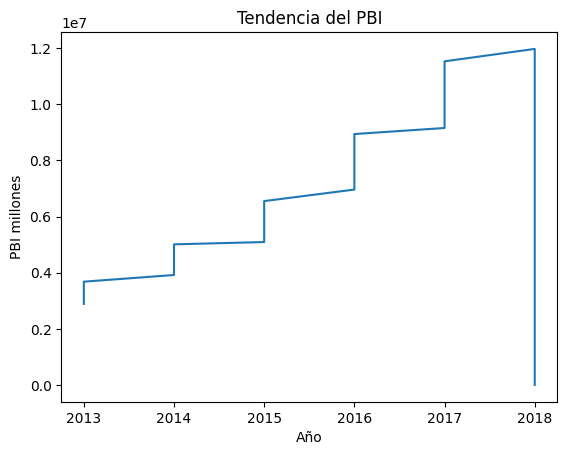

In [48]:
plt.plot(df_indicadores['Año'], df_indicadores['PBI millones'])
plt.xlabel('Año')
plt.ylabel('PBI millones')
plt.title('Tendencia del PBI')
plt.show()



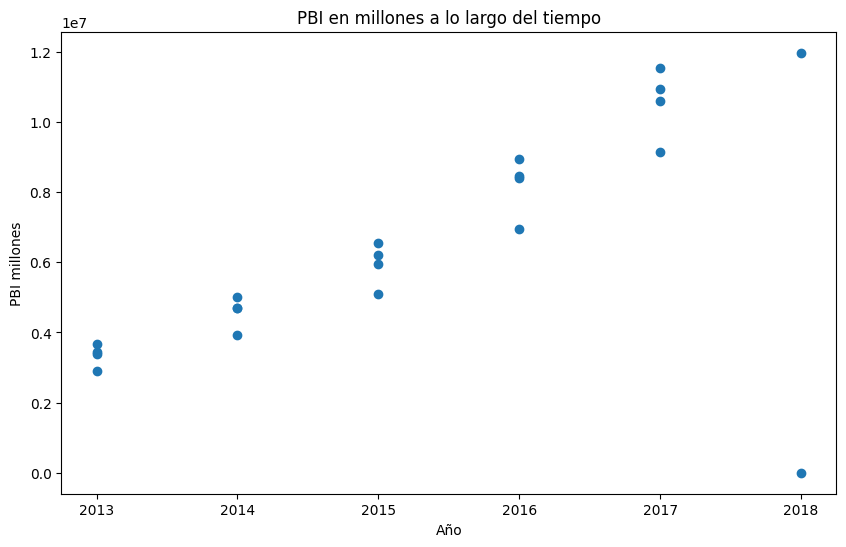

In [161]:
plt.figure(figsize=(10, 6))
plt.scatter(df_indicadores['Año'], df_indicadores['PBI millones'])
plt.xlabel('Año')
plt.ylabel('PBI millones')
plt.title('PBI en millones a lo largo del tiempo')
plt.show()


Los valores registrados del PBI anualmente marcan una tendencia a incrementarse a lo largo de los años. Y donde el último dato correspondería a un dato faltante o que no se encuentra ya que corresponde a cero. 

_______________________________________________________________________________________________

# Dataframes complementarios:

## Dataframe:  "df_compl_reclamos"

In [165]:
# Carga del archivo:
df_compl_reclamos = pd.read_csv(r"Complementarios\1.Reclamos_Porcentaje de reclamos por tipo de reclamo_año en curso.csv")
df_compl_reclamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tipo de reclamo  4 non-null      object
 1   Cantidad         4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [167]:
df_compl_reclamos.head(3)

,Tipo de reclamo,Cantidad
0,Facturación,1816
1,Gestiones Administrativas,2474
2,Otros,561


In [169]:
descripcion_cantidad = df_compl_reclamos.describe()
print(descripcion_cantidad)


          Cantidad
count     4.000000
mean   2556.500000
std    2039.698425
min     561.000000
25%    1502.250000
50%    2145.000000
75%    3199.250000
max    5375.000000


La máxima cantidad de reclamos realizados es de 5375 y el minimo registrado es de 561. Este dataset complementario no cuenta con las fechas correspondientes a esos reclamos

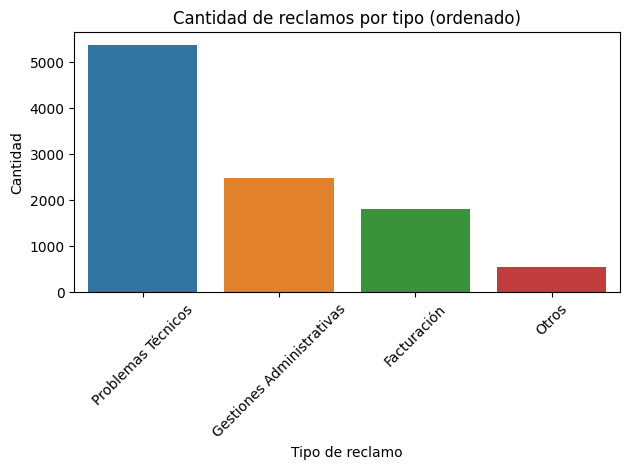

In [174]:
df_compl_reclamos_ordenado = df_compl_reclamos.sort_values(by='Cantidad', ascending=False)
sns.barplot(x='Tipo de reclamo', y='Cantidad', data=df_compl_reclamos_ordenado)
plt.xlabel('Tipo de reclamo')
plt.ylabel('Cantidad')
plt.title('Cantidad de reclamos por tipo (ordenado)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En este dataset se registran 4 tipos de reclamos, siendo los principales por problemas técnicos. 

____________________________________________________________________________________________________

## Dataframe:  "df_compl_penetracion"

In [176]:
# Carga del archivo:
df_compl_penetracion = pd.read_csv(r"Complementarios\1.telefonia_fija_Penetración provincial de la telefonía fija_accesos por cada 100 hogares.csv")
df_compl_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Año                                          840 non-null    int64 
 1   Trimestre                                    840 non-null    int64 
 2   Provincia                                    840 non-null    object
 3   Accesos telefonía fija por cada 100 hab      840 non-null    object
 4   Accesos telefonía fija por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(3)
memory usage: 32.9+ KB


In [179]:
df_compl_penetracion.sample(3)

,Año,Trimestre,Provincia,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares
354,2017,3,San Luis,"11,12","38,84"
229,2016,2,Misiones,"9,19","33,73"
90,2014,4,San Luis,"10,84","37,88"


In [182]:
df_compl_penetracion['Accesos telefonía fija por cada 100 hab'] = df_compl_penetracion['Accesos telefonía fija por cada 100 hab'].str.replace(',', '.').astype(float)
df_compl_penetracion['Accesos telefonía fija por cada 100 hogares'] = df_compl_penetracion['Accesos telefonía fija por cada 100 hogares'].str.replace(',', '.').astype(float)

# Análisis de correlación entre las variables numéricas
correlacion = df_compl_penetracion[['Accesos telefonía fija por cada 100 hab', 'Accesos telefonía fija por cada 100 hogares']].corr()
print(correlacion)


                                             Accesos telefonía fija por cada 100 hab  \
Accesos telefonía fija por cada 100 hab                                     1.000000   
Accesos telefonía fija por cada 100 hogares                                 0.975915   

                                             Accesos telefonía fija por cada 100 hogares  
Accesos telefonía fija por cada 100 hab                                         0.975915  
Accesos telefonía fija por cada 100 hogares                                     1.000000  


Por lo tanto, en el contexto del conjunto de datos, como es esperable podemos inferir que hay una fuerte relación positiva entre la cantidad de accesos de telefonía fija por cada 100 habitantes y la cantidad de accesos de telefonía fija por cada 100 hogares.

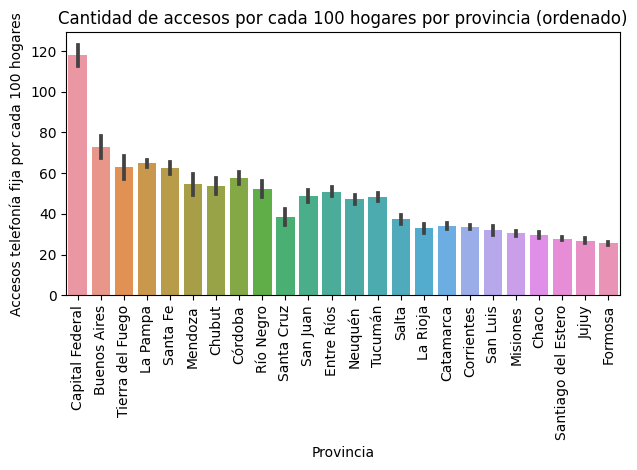

In [186]:
# Ordenar el DataFrame 
df_compl_penetracion_ordenado = df_compl_penetracion.sort_values(by='Accesos telefonía fija por cada 100 hogares', ascending=False)

# Gráfico de barras: Cantidad de accesos por cada 100 hogares por provincia
sns.barplot(x='Provincia', y='Accesos telefonía fija por cada 100 hogares', data=df_compl_penetracion_ordenado)
plt.xlabel('Provincia')
plt.ylabel('Accesos telefonía fija por cada 100 hogares')
plt.title('Cantidad de accesos por cada 100 hogares por provincia (ordenado)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Podemos comparar las 2 variables de este df que ofrecen información del acceso de telefonía fija

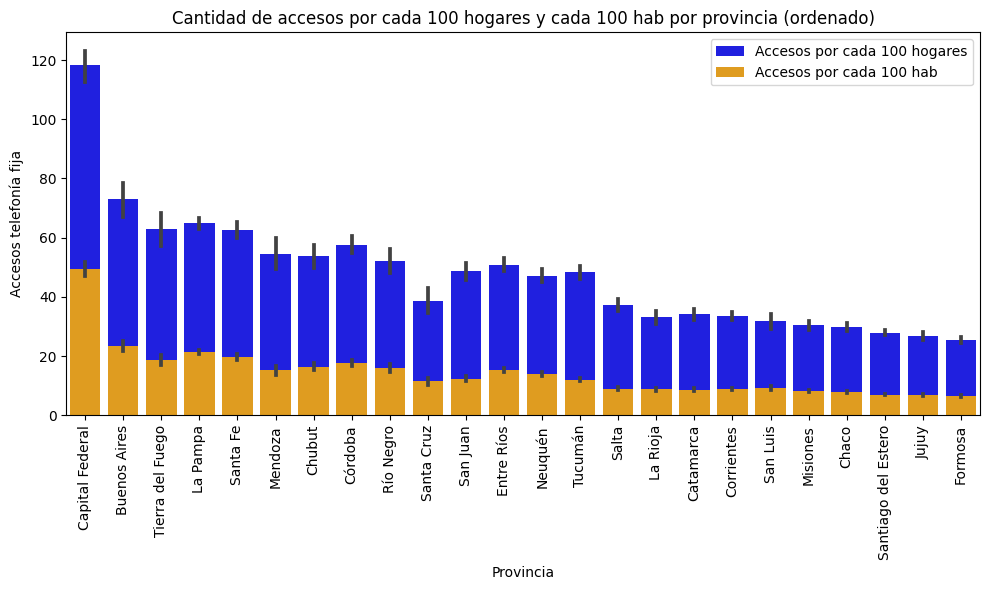

In [188]:
# Ordenar el DataFrame 
df_compl_penetracion_ordenado = df_compl_penetracion.sort_values(by='Accesos telefonía fija por cada 100 hogares', ascending=False)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfico de barras agrupadas: Cantidad de accesos por cada 100 hogares y cada 100 hab por provincia
sns.barplot(x='Provincia', y='Accesos telefonía fija por cada 100 hogares', data=df_compl_penetracion_ordenado, color='blue', label='Accesos por cada 100 hogares')
sns.barplot(x='Provincia', y='Accesos telefonía fija por cada 100 hab', data=df_compl_penetracion_ordenado, color='orange', label='Accesos por cada 100 hab')

plt.xlabel('Provincia')
plt.ylabel('Accesos telefonía fija')
plt.title('Cantidad de accesos por cada 100 hogares y cada 100 hab por provincia (ordenado)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


De forma casi similar a lo anteriormente observado en "df_combinado", Buenos Aires es una de las provincias con más acceso de telefonía fija. 

________________________________________________________________________________________________

## Resumen

Los dataframes analizados ofrecen información sobre los diferentes tipos de accesos a internet en Argentina, como ADSL, cablemodem, fibra óptica, wireless y otros. Durante el período comprendido entre 2013 y 2018, se observa una tendencia nacional hacia un aumento en las conexiones de cablemodem y fibra óptica, mientras que las conexiones de ADSL se mantuvieron relativamente estables hasta el año 2017 y luego comenzaron a disminuir.

Este cambio en las conexiones puede atribuirse al avance de nuevas tecnologías. Durante ese período, hubo un crecimiento significativo en las alternativas de conexión a internet, como la expansión de la cobertura de fibra óptica y el desarrollo de redes de cablemodem. Estas tecnologías (fibra óptica y cablemodem) ofrecen velocidades de conexión más altas y una mayor estabilidad en comparación con el ADSL, lo que puede haber llevado a que los usuarios opten por migrar a estas nuevas opciones. El ADSL puede haberse vuelto insuficiente para cubrir estas necesidades y los usuarios optaron por tecnologías de conexión más avanzadas.

Además, se encontraron correlaciones positivas entre algunas velocidades de conexión, lo que respalda la tendencia mencionada anteriormente. Esto indica que a medida que los usuarios optan por conexiones de mayor velocidad, también se inclinan hacia tecnologías más avanzadas, como el cablemodem y la fibra óptica.

En relación con el contexto socioeconómico, es importante mencionar que Argentina experimentó un período de inflación durante estos años, lo que puede haber influido en los precios y la disponibilidad de los servicios de internet. La devaluación de la moneda local (peso argentino) en relación con el dólar estadounidense también puede haber afectado los costos de las conexiones de internet.

Es relevante destacar que el acceso a internet juega un papel fundamental en el desarrollo económico y social de un país. A medida que la tecnología avanza y se vuelve más accesible, es esencial garantizar una infraestructura adecuada y políticas que fomenten la inclusión digital en toda la población.

En resumen, el análisis de los dataframes revela una tendencia hacia el crecimiento de las conexiones de cablemodem y fibra óptica, junto con una disminución en las conexiones de ADSL a partir de 2017 en Argentina. Esto puede atribuirse al avance tecnológico, la búsqueda de mayores velocidades y estabilidad en la conexión, así como a factores socioeconómicos. Estos insights proporcionan una comprensión más profunda del panorama de las telecomunicaciones en el país y pueden servir como base para la toma de decisiones informadas en el sector.

Durante el análisis de las tendencias de las conexiones de internet en Argentina entre 2013 y 2018, es importante considerar algunos aspectos adicionales que pueden arrojar más luz sobre el panorama de las telecomunicaciones en el país.

En primer lugar, es relevante examinar las políticas gubernamentales relacionadas con las telecomunicaciones durante este período. El gobierno argentino implementó varias iniciativas para fomentar el acceso a internet en áreas rurales y promover la conectividad en todo el país. Estas políticas incluyeron programas de expansión de la cobertura de fibra óptica y el lanzamiento de programas de acceso a internet de bajo costo. El impacto de estas políticas puede ser un factor importante en las tendencias observadas en las conexiones de internet.

Además, es esencial considerar la infraestructura de telecomunicaciones en Argentina. Durante este período, hubo avances significativos en la infraestructura de fibra óptica en áreas urbanas, lo que permitió ofrecer velocidades de conexión más altas y una mayor estabilidad. Sin embargo, en áreas rurales y remotas, la disponibilidad de conexiones de alta velocidad puede haber sido limitada. El análisis de la cobertura y la calidad de las conexiones en diferentes regiones puede proporcionar una visión más completa de las tendencias observadas.

Los precios y los planes de servicios de internet también desempeñan un papel crucial en la elección de los usuarios. Durante este período, hubo fluctuaciones en los precios de los servicios de internet en Argentina debido a la inflación y la devaluación de la moneda local. El análisis de los precios y la relación costo-beneficio de las diferentes opciones de conexión puede ayudar a comprender mejor las decisiones de los usuarios.

Es importante tener en cuenta las nuevas tecnologías emergentes en el campo de las telecomunicaciones. Se realizaron avances significativos en tecnologías como el despliegue de redes 4G. Estas innovaciones podrían haber influido en las preferencias de los usuarios y en las tendencias de conexión.

Por último, el análisis del uso de internet y la adopción de aplicaciones y servicios en línea puede brindar información adicional. Durante este período, hubo un aumento en el uso de servicios de streaming, redes sociales y aplicaciones de comunicación. Estos cambios en el comportamiento de los usuarios pueden haber influido en la elección de conexiones y en la demanda de velocidades más altas.

Fuentes consultadas para ampliar el análisis:

https://www.telam.com.ar
https://www.telam.com.ar//advf/documentos/2013/06/51c0debbac33a.pdf
https://www.enacom.gob.ar/multimedia/normativas/2014/Ley_27078-txt_actualizado.pdf
https://www.argentina.gob.ar/sites/default/files/2023/03/el_estado_nacional_y_la_universalizacion_del_acceso_a_internet.pdf
https://www.argentina.gob.ar/noticias/el-gobierno-nacional-invierte-mas-de-289-millones-de-pesos-para-reducir-la-brecha-digital
https://www.argentina.gob.ar/noticias/desde-2015-se-invirtieron-4000-millones-para-llevar-internet-mas-argentinos
https://www.infobae.com/2013/10/30/1520229-como-es-el-perfil-del-usuario-argentino-internet/
https://www.infobae.com/2015/01/12/1620472-casi-el-50-los-argentinos-compraron-internet-2014/
https://www.indec.gob.ar/uploads/informesdeprensa/entic_10_15.pdf
https://www.enacom.gob.ar/institucional/argentina-avanza-con-la-banda-ancha-movil_n1752
https://www.telam.com.ar/notas/201703/181431-conexiones-internet-4g-2016.html